Master 2 Bioinformatique 

Auteure : Lauryn Trouillot

Année : 2024 - 2025

# Projet Data science for bioinformatics 

In [1]:
# Impprtation des librairies
import math
import random
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy
sns.set()

In [2]:
# Pour des résultats reproductibles
np.random.seed(10)
random.seed(10)

## Partie 1 – Prendre en main d’un jeu de données, nettoyage et curation

In [3]:
def csv_to_dict(fichier, sep) : 
    """
    Convertie un CSV en dictionnaire

    Args:
        fichier (str): Le chemin vers un fichier csv
        sep (str): Le caractère des séparation des colonne dans le fichier

    Returns:
        dict: Dictionnaire dont les clefs sont les en-têtes des fichiers (1ère ligne).
    """
    csv_dict ={}
    with open(fichier,'r') as f :
        lignes=f.readlines()
        cles = lignes[0].strip().split(sep)
        for cle in cles : 
            csv_dict[cle] = []
        for ligne in lignes[1:] : 
            valeurs = ligne.strip().split(sep)
            for i, valeur in enumerate(valeurs) : 
                cle = cles[i]
                # Transformation en numérique si nécessaire
                try : 
                    valeur = int(valeur)
                except ValueError : 
                    try : 
                        valeur = float(valeur)
                    except ValueError :
                        pass
                csv_dict[cle].append(valeur)
    return csv_dict

# Importation du jeu de données 
water_df = csv_to_dict("/home/lauryn/Datascience/6_water/water/data.csv", ",")

### 1.1 Identification des problèmes éventuels et vérification des types

Le jeu de données est composé de 3276 observations. Voici les différentes variables observées :

- **pH** : Le niveau de pH de l'eau.
- **Hardness** : La dureté de l'eau, une mesure de la teneur en minéraux.
- **Solids** : Les solides dissous totaux dans l'eau.
- **Chloramines** : La concentration de chloramines dans l'eau.
- **Sulfate** : La concentration de sulfate dans l'eau.
- **Conductivity** : La conductivité électrique de l'eau.
- **Organic_carbon** : La teneur en carbone organique dans l'eau.
- **Trihalomethanes** : La concentration de trihalométhanes dans l'eau.
- **Turbidity** : Le niveau de turbidité, une mesure de la clarté de l'eau.
- **Potability** : La variable cible ; indique la potabilité de l'eau avec les valeurs 1 (potable) et 0 (non potable).

La variable à prédire est : **Potability**

In [4]:
##  Affichage de quelques lignes 
# Le nombre de ligne a afficher 
nb_ligne = 10

# Noms des colonnes 
for col in water_df.keys() :  
    print(col, end=' | ')
print("\n")

# Affichage des valeurs 
for i in range(nb_ligne) :
    for col in water_df.keys() : 
        valeur = water_df[col][i]
        if valeur == '' :
            print("NA", end= " | ")
        else : 
            print (valeur, end= " | " )
    print("\n")


ph | Hardness | Solids | Chloramines | Sulfate | Conductivity | Organic_carbon | Trihalomethanes | Turbidity | Potability | 

NA | 204.8904554713363 | 20791.318980747026 | 7.300211873184757 | 368.51644134980336 | 564.3086541722439 | 10.3797830780847 | 86.9909704615088 | 2.9631353806316407 | 0 | 

3.71608007538699 | 129.42292051494425 | 18630.057857970347 | 6.635245883862 | NA | 592.8853591348523 | 15.180013116357259 | 56.32907628451764 | 4.500656274942408 | 0 | 

8.099124189298397 | 224.23625939355776 | 19909.541732292393 | 9.275883602694089 | NA | 418.6062130644815 | 16.868636929550973 | 66.42009251176368 | 3.0559337496641685 | 0 | 

8.316765884214679 | 214.37339408562252 | 22018.417440775294 | 8.05933237743854 | 356.88613564305666 | 363.2665161642437 | 18.436524495493302 | 100.34167436508008 | 4.628770536837084 | 0 | 

9.092223456290965 | 181.10150923612525 | 17978.98633892625 | 6.546599974207941 | 310.13573752420444 | 398.41081338184466 | 11.558279443446395 | 31.997992727424737 | 4.

#### Visualisation des données 

In [5]:
# Pour voir le nombre d'observations incomplètes
nb_observation = len(water_df["Hardness"])
print("Nombre d'observation total : " + str(nb_observation))
na = False
nb_na = 0
for i in range(nb_observation) :
    for col in water_df.keys() : 
        valeur = water_df[col][i]
        if valeur == '' :
            na = True
    if na : 
        nb_na += 1 
    na = False

print ("Le nombre d'observation incomplète : " + str(nb_na))

Nombre d'observation total : 3276
Le nombre d'observation incomplète : 1265


In [6]:
# Importation du jeu de données 
water_df = np.array(list(water_df.values()))
water_df = np.where(water_df == '', None, water_df)
water_df = water_df.astype(object)
water_df = np.where(water_df == None, np.nan, water_df)
water_df = water_df.astype(float).transpose()

colnames = ["ph" , "Hardness" , "Solids", "Chloramines" , "Sulfate" , "Conductivity" , "Organic_carbon" , "Trihalomethanes" , "Turbidity" , "Potability"]

In [7]:
# Répartition des données manquantes 
for i, col in enumerate(colnames):
    print(f"{col}: {np.isnan(water_df[:, i]).sum()}")
print(f"Nombre total de valeurs manquantes :{np.count_nonzero(np.isnan(water_df))}")

ph: 491
Hardness: 0
Solids: 0
Chloramines: 0
Sulfate: 781
Conductivity: 0
Organic_carbon: 0
Trihalomethanes: 162
Turbidity: 0
Potability: 0
Nombre total de valeurs manquantes :1434


Il y a 1434 valeurs manquantes réparties sur 1265 observations. Il y a notamment beaucoup de valeurs manquantes pour les variables pH et Sulfate.

In [8]:
def  print_stats(tableau) : 
    """
    Affiche la moyenne, la mediane, l'ecart-type, le minimum et le maximum des variable d'un tableau Numpy

    Args:
        tableau (numpy array): Le tableau a étudier
    """
    for col in range(tableau.shape[1]) : 
        moyenne = np.nanmean(tableau[:, col])
        mediane = np.nanmedian(tableau[:, col])
        ec = np.nanstd(tableau[:, col])
        min_col = np.nanmin(tableau[:, col])
        max_col = np.nanmax(tableau[:, col])
        print(f"Colonne {colnames[col]}: Moyenne = {moyenne:.2f}, Médiane = {mediane:.2f}, Écart-type = {ec:.2f}, Valeur minimum = {min_col:.2f}, Valeur maximal = {max_col:.2f}")

print_stats(water_df)

Colonne ph: Moyenne = 7.08, Médiane = 7.04, Écart-type = 1.59, Valeur minimum = 0.00, Valeur maximal = 14.00
Colonne Hardness: Moyenne = 196.37, Médiane = 196.97, Écart-type = 32.87, Valeur minimum = 47.43, Valeur maximal = 323.12
Colonne Solids: Moyenne = 22014.09, Médiane = 20927.83, Écart-type = 8767.23, Valeur minimum = 320.94, Valeur maximal = 61227.20
Colonne Chloramines: Moyenne = 7.12, Médiane = 7.13, Écart-type = 1.58, Valeur minimum = 0.35, Valeur maximal = 13.13
Colonne Sulfate: Moyenne = 333.78, Médiane = 333.07, Écart-type = 41.41, Valeur minimum = 129.00, Valeur maximal = 481.03
Colonne Conductivity: Moyenne = 426.21, Médiane = 421.88, Écart-type = 80.81, Valeur minimum = 181.48, Valeur maximal = 753.34
Colonne Organic_carbon: Moyenne = 14.28, Médiane = 14.22, Écart-type = 3.31, Valeur minimum = 2.20, Valeur maximal = 28.30
Colonne Trihalomethanes: Moyenne = 66.40, Médiane = 66.62, Écart-type = 16.17, Valeur minimum = 0.74, Valeur maximal = 124.00
Colonne Turbidity: Moyen

Pour la plupart des variables (toutes sauf Solids), la moyenne et la médiane sont très proches, ce qui suggère une distribution symétrique des données. Pour savoir s'il y a une forte variabilité autour de la moyenne, un calcul de coefficient de variation sera réalisé.

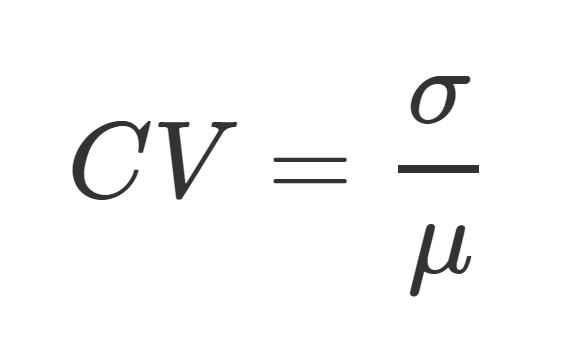

In [9]:
for col in range(water_df.shape[1]) : 
    moyenne = np.nanmean(water_df[:, col])
    ec = np.nanstd(water_df[:, col])
    CV = ec / moyenne
    print(f"Coefficient de variation pour la colonne {colnames[col]} : {CV:.2f}")

Coefficient de variation pour la colonne ph : 0.23
Coefficient de variation pour la colonne Hardness : 0.17
Coefficient de variation pour la colonne Solids : 0.40
Coefficient de variation pour la colonne Chloramines : 0.22
Coefficient de variation pour la colonne Sulfate : 0.12
Coefficient de variation pour la colonne Conductivity : 0.19
Coefficient de variation pour la colonne Organic_carbon : 0.23
Coefficient de variation pour la colonne Trihalomethanes : 0.24
Coefficient de variation pour la colonne Turbidity : 0.20
Coefficient de variation pour la colonne Potability : 1.25


Les données proviennent de mesures environnementales, où la variabilité naturelle est élevée. Ainsi, un seuil de 30 % de variabilité est acceptable. Selon les coefficients de variation, seule la colonne des Solids dépasse ce seuil. Les différentes variables ont une faible variabilité autour de la moyenne.

Une variabilité très élevée est observée pour la variable Potability, ce qui est logique puisqu'il s'agit d'une variable catégorielle binaire : chaque échantillon est soit potable, soit non potable.

Ces informations seront utilisées pour nettoyer le jeu de données.

**La stratégie de nettoyage**

Dans un premier temps, les variables utiles à la discrimination d'une eau potable ou non seront identifiées à l'aide de la littérature. Ensuite, parmi ces variables, celles qui sont continues et celles qui sont catégorielles seront vérifiées. La littérature permet également de définir les plages de concentration attendues pour une eau potable pour les différents paramètres. Les observations pour lesquelles la colonne Potability indique 1, mais dont la concentration du paramètre n'est pas comprise dans la plage attendue, pourront donc être retirées. Enfin, pour combler les valeurs manquantes, la moyenne sera imputée aux observations dont le coefficient de variation est inférieur à 30 % ou 20 %, et deux jeux de données seront créés.

Selon la littérature l'ensemble des variables sont importante dans l'évaluation de la qualité de l'eau. 

Voici les informations trouvés sur différents sites : 

- **pH**

    - Entre 0 et 6,5 : eau acide
    - Entre 6,5 et 8,5 : eau potable
    - Entre 8,5 et 14 : eau basique

- **Dureté (TH)**

    - 0 - 50 mg/L: eau très douce
    - 50 - 100 mg/L : eau douce
    - 100 - 200 mg/L : eau moyennement dure
    - 200 - 300 mg/L : eau dure
    - 300 mg/L : eau très dure

- **Solides dissous totaux**

    - < 300 mg/L : eau de faible minéralisation
    - 300 - 600 mg/L : eau de minéralisation moyenne
    - 600 mg/L : eau fortement minéralisée

- **Chloramines**

    - < 0,5 mg/L : niveau acceptable
    - 0,5 - 1 mg/L : niveau modéré
    - 1 mg/L : niveau élevé

- **Sulfates**

    - < 250 mg/L : concentration acceptable
    - 250 mg/L : concentration élevée

- **Conductivité**

    - < 200 µS/cm : faible minéralisation
    - 200 - 1000 µS/cm : minéralisation moyenne
    - 1000 µS/cm : forte minéralisation

- **Carbone organique**

    - < 2 mg/L : faible teneur
    - 2 - 4 mg/L : teneur moyenne
    - 4 mg/L : teneur élevée

- **Trihalométhanes**

    - < 80 µg/L : concentration acceptable
    - 80 µg/L : concentration élevée

- **Turbidité**

    - < 1 UNT : eau claire
    - 1 - 5 UNT : eau légèrement trouble
    - 5 UNT : eau trouble visible à l'œil nu

Pour les mineraux (Solids), les valeurs sont bien au-delà des catégories définies, ce qui suggère soit un problème au niveau des unités, soit une incohérence dans les données.

Définition des fonctions pour identifier le type de variable. L'imputation de la moyenne est uniquement realisé pour les variables continues.

In [10]:
def is_categorical(liste):
    """
    Détermine si la liste fournie contient des valeurs catégorielles.

    Args:
        liste (list): Liste de valeurs à analyser.

    Returns:
        set ou bool: Ensemble des valeurs si elles sont catégorielles, ou False sinon.
    """
    categorical = False
    types_uniques = set(type(element) for element in liste)
    # Variable catégorielle si on a des string ou si on a moins de 10 entiers pour une variables
    categorical = (str in types_uniques or bool in types_uniques) or ((int in types_uniques or float in types_uniques) and len(set(liste)) <= 10)
    if categorical:
        return set(element for element in liste)
    else:
        return categorical


def is_continuous(liste):
    """
    Détermine si la liste fournie contient des valeurs continues.

    Args:
        liste (list): Liste de valeurs à analyser.

    Returns:
        set ou bool: Ensemble des types si la variable est continue, ou False sinon.
    """
    if is_categorical(liste) == False:
        return set(type(element) for element in liste)
    else:
        print("Cette variable n'est pas continue")
        return False


def categorical_or_continuous(liste):
    """
    Identifie la nature de la liste (catégorielle ou continue).

    Args:
        liste (list): Liste de valeurs à analyser.

    Returns:
        set: Ensemble des valeurs si la liste est catégorielle,
             ou ensemble des types si la liste est continue.
    """
    categorical = False
    types_uniques = set(type(element) for element in liste)
    categorical = (str in types_uniques or bool in types_uniques) or ((int in types_uniques or float in types_uniques) and len(set(liste)) <= 10)
    if categorical:
        return set(element for element in liste)
    else:
        return set(type(element) for element in liste)

Le type de variable du jeu de données :

In [11]:
for col in range(water_df.shape[1]) : 
    print(f"Colonne {colnames[col]}: ")
    print(categorical_or_continuous(water_df[:, col].tolist()))

Colonne ph: 
{<class 'float'>}
Colonne Hardness: 
{<class 'float'>}
Colonne Solids: 
{<class 'float'>}
Colonne Chloramines: 
{<class 'float'>}
Colonne Sulfate: 
{<class 'float'>}
Colonne Conductivity: 
{<class 'float'>}
Colonne Organic_carbon: 
{<class 'float'>}
Colonne Trihalomethanes: 
{<class 'float'>}
Colonne Turbidity: 
{<class 'float'>}
Colonne Potability: 
{0.0, 1.0}


La plupart des variables sont continues et sont de type réelle. La variable "Potability" est catégorielle, avec des valeurs de 0 ou 1.

### 1.2 Outillage

Pour le nettoyage des données, l'attention s'est portée sur deux variables : le pH et la turbidité de l'eau. Si l'un de ces deux paramètres est jugé trop élevé, l'eau n'est plus considérée comme potable, voire toxique. Pour ces deux variables, si l'eau était classée comme potable, mais que la concentration se situait hors de la plage attendue, l'observation a été retirée.

(Le même traitement avait été réalisé sur l'ensemble des variables, mais cela aboutissait à la suppression de toutes les observations potables du jeu de données.

Cela amène à s'interroger sur la qualité du jeu de données. Il semblerait que ce jeu ait été simulé et que les valeurs ne soient pas réelles, ce qui pourrait poser problème dans la suite des analyses.)

In [12]:
def clean_data(numpy_table, cv_pourcentage):
    """
    Nettoie les données en fonction d'un seuil de coefficient de variation et retire certaines valeurs aberrantes.

    Args:
        numpy_table (numpy.ndarray): Tableau contenant les données initiales.
        cv_pourcentage (float): Pourcentage du coefficient de variation utilisé pour l'imputation.

    Returns:
        numpy.ndarray:
            Tableau NumPy nettoyé après imputation des valeurs manquantes et suppression des observations
            jugées incohérentes selon les critères définis.
    """
    table_copy = np.copy(numpy_table)
    print("Avant nettoyage : ")
    print(f"Forme : {table_copy.shape}")

    for col in range(table_copy.shape[1]) : 
        moyenne = np.nanmean(table_copy[:, col])
        ec = np.nanstd(table_copy[:, col])
        CV = ec / moyenne
        if CV < cv_pourcentage / 100 : 
            table_copy[:, col] = np.nan_to_num(table_copy[:, col], nan=moyenne)

    # Suppression des observations abberantes selon la biblio : 
    table_copy = table_copy[~(((table_copy[:, 0] < 6.5) | (table_copy[:, 0] > 8.5)) & (table_copy[:, -1] == 1))]
    table_copy = table_copy[~((table_copy[:, 8] > 5) & (table_copy[:, -1] == 1))]

    table_copy = table_copy[~np.isnan(table_copy).any(axis=1)]
    print("Après nettoyage : ")
    print(f"Forme : {table_copy.shape}")

    name = f"data_CV{cv_pourcentage}.csv"
    np.savetxt(name, table_copy, delimiter=",", header=",".join(colnames), comments='')

    return table_copy


In [13]:
print ("Info tableau avec un coefficient de variation de 30% :")
cv_pourcentage = 30 
cleaned_data = clean_data(water_df, cv_pourcentage)
print ("Info tableau avec un coefficient de variation de 20% :")
cv_pourcentage = 20
cleaned_data = clean_data(water_df, cv_pourcentage)


Info tableau avec un coefficient de variation de 30% :
Avant nettoyage : 
Forme : (3276, 10)
Après nettoyage : 
Forme : (2692, 10)
Info tableau avec un coefficient de variation de 20% :
Avant nettoyage : 
Forme : (3276, 10)
Après nettoyage : 
Forme : (2105, 10)


Parfois, il peut être nécessaire de convertir des variables continues en variables catégorielles et inversement.

Pour passer d'une variable continue à une variable catégorielle, il existe plusieurs méthodes :

- Si une variable numérique contient en réalité un petit nombre de valeurs différentes, il suffit de convertir le type de l’objet de numérique à facteur.
- Si, en revanche, le nombre de valeurs différentes est important (dizaines ou plus), il faut créer des regroupements. Pour effectuer ces regroupements, les informations de la littérature ont été utilisées.

À l'inverse, pour passer d'une variable catégorielle à une variable continue, il suffit d'attribuer une valeur numérique différente à chacune des catégories.

Ce n'était pas nécessaire pour ces données, car la variable "Potability" était déjà numérique.

In [14]:
def continu_to_cate(numpy_table, liste_col):
    """
    Convertit les colonnes continues spécifiées en catégories selon des plages de valeurs prédéfinies.

    Args:
        numpy_table (numpy.ndarray): Tableau NumPy contenant les données initiales.
        liste_col (list): Liste des indices des colonnes à convertir.

    Returns:
        numpy.ndarray: Nouveau tableau NumPy avec les colonnes spécifiées transformées en catégories.
    """
    table_copy = np.copy(numpy_table).astype(object)
    for col in liste_col:
        if col == 0 :  # pH
            conditions = [
                (table_copy[:, col] >= 0)& (table_copy[:, col] < 6.5),
                (table_copy[:, col] >= 6.5) & (table_copy[:, col] < 8.5),
                (table_copy[:, col] >= 8.5) & (table_copy[:, col] <= 14)
            ]
            choices = ["Acide", "Neutre", "Basique"]
            table_copy[:, col] = np.select(conditions, choices, default="pH out of range")
        elif col == 1 :  # Hardness
            conditions = [
                (table_copy[:, col] >= 0) & (table_copy[:, col] < 50),
                (table_copy[:, col] >= 50) & (table_copy[:, col] < 100),
                (table_copy[:, col] >= 100)& (table_copy[:, col] < 200),
                (table_copy[:, col] >= 200) & (table_copy[:, col] < 300),
                (table_copy[:, col] >= 300)
            ]
            choices = ["Tres douce", "Douce", "Moyennement dure", "Dure", "Tres dure"]
            table_copy[:, col] = np.select(conditions, choices, default="Hardness out of range")
        elif col == 2 :  # Solids
            conditions = [
                (table_copy[:, col] < 300),
                (table_copy[:, col] >= 300) & (table_copy[:, col] < 600),
                (table_copy[:, col] >= 600)
            ]
            choices = ["Faible mineralisation", "Mineralisation moyenne", "Forte mineralisation"]
            table_copy[:, col] = np.select(conditions, choices, default="Solids out of range")
        elif col == 3 :  # Chloramines
            conditions = [
                (table_copy[:, col] < 0.5),
                (table_copy[:, col] >= 0.5) & (table_copy[:, col] < 1),
                (table_copy[:, col] >= 1)
            ]
            choices = ["Acceptable", "Moderee", "Elevee"]
            table_copy[:, col] = np.select(conditions, choices, default="Chloramines out of range")
        elif col == 4 :  # Sulfate
            conditions = [
                (table_copy[:, col] < 250),
                (table_copy[:, col] >= 250)
            ]
            choices = ["Acceptable", "Elevee"]
            table_copy[:, col] = np.select(conditions, choices, default="Sulfate out of range")
        elif col == 5 :  # Conductivity
            conditions = [
                (table_copy[:, col] < 200),
                (table_copy[:, col] >= 200)& (table_copy[:, col] < 1000),
                (table_copy[:, col] >= 1000)
            ]
            choices = ["Faible", "Moyen", "Fort"]
            table_copy[:, col] = np.select(conditions, choices, default="Conductivity out of range")
        elif col == 6 :  # Organic_carbon
            conditions = [
                (table_copy[:, col] < 2),
                (table_copy[:, col] >= 2) & (table_copy[:, col] < 4),
                (table_copy[:, col] >= 4)
            ]
            choices = ["Faible", "Moyen", "Fort"]
            table_copy[:, col] = np.select(conditions, choices, default="Organic_carbon out of range")
        elif col == 7 :  # Trihalomethanes
            conditions = [
                (table_copy[:, col] < 80),
                (table_copy[:, col] >= 80)
            ]
            choices = ["Acceptable", "Elevee"]
            table_copy[:, col] = np.select(conditions, choices, default="Trihalomethanes out of range")
        elif col == 8:  # Turbidity
            conditions = [
                (table_copy[:, col] < 1),
                (table_copy[:, col] >= 1)& (table_copy[:, col] < 5),
                (table_copy[:, col] >= 5)
            ]
            choices = ["Eau clair", "Eau légerement trouble", "Eau trouble"]
            table_copy[:, col] = np.select(conditions, choices, default="Turbidity out of range")
        else:
            print("Cette colonne n'existe pas")
    return table_copy


### 1.3 La stérilisation en python

In [15]:
import pickle

name = f"water_{cv_pourcentage}.pkl"

# Sterilisation du fichier 
with open (name, 'wb') as fichier : 
    pickle.dump(cleaned_data, fichier)

In [16]:
#Déstérilisation de l'objet 
with open(name, 'rb') as fichier : 
    water_30 = pickle.load(fichier)

## Partie 2 : Analyses


In [17]:
water_20 = pd.read_csv("data_CV20.csv", usecols = ["ph" , "Hardness" , "Solids", "Chloramines" , "Sulfate" , "Conductivity" , "Organic_carbon" , "Trihalomethanes" , "Turbidity"])
water_30 = pd.read_csv("data_CV30.csv", usecols = ["ph" , "Hardness" , "Solids", "Chloramines" , "Sulfate" , "Conductivity" , "Organic_carbon" , "Trihalomethanes" , "Turbidity"])

In [18]:
use_water_20 = True  # False pour water_30

if use_water_20:
    data = water_20
    data_source = "water_20"
    data_cv = 20
else:
    data = water_30
    data_source = "water_30"
    data_cv = 30 

Les deux jeux de données ont été testés, mais le jeu "water_20" (jeu de données produit avec le coefficient de variation de 20%) semble être légèrement meilleur. Les résultats seront donc présentés à partir de celui-ci. Il est toujours possible de réaliser des tests en définissant use_water_20 sur `False`.

### 2.1 Analyses graphiques

#### 2.1.1 Distribution univariée 

Les 3 variables sur lesquelles des modifications ont été réalisées sont présentées ci-dessous. 

Text(0.5, 1.0, 'Distribution des Sulfate (water_20)')

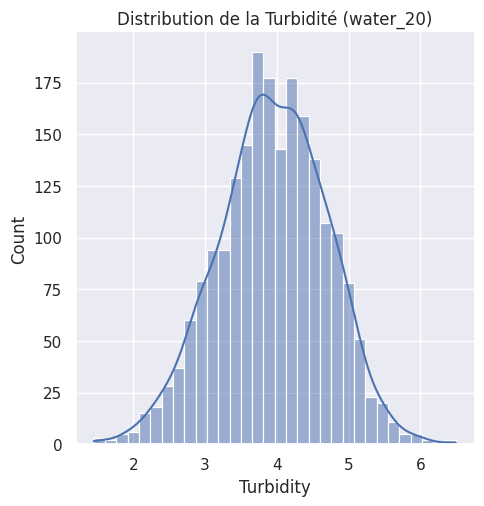

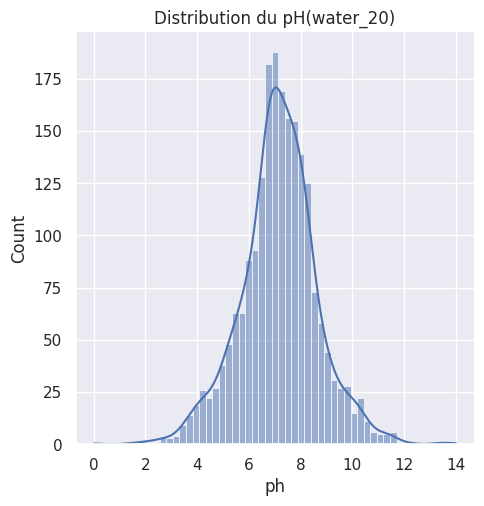

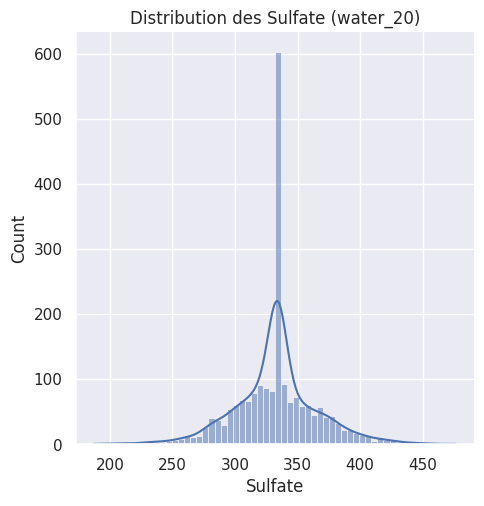

In [19]:
sns.displot(data.Turbidity, kde=True)
plt.title(f"Distribution de la Turbidité ({data_source})")
sns.displot(data.ph, kde=True)
plt.title(f"Distribution du pH({data_source})")
sns.displot(data.Sulfate, kde=True)
plt.title(f"Distribution des Sulfate ({data_source})")

Ces 3 histogrammes représentent la distribution des variables pH, turbidité et sulfate du jeu de données nettoyé. 

Pour la colonne pH, plus de 400 valeurs manquaient. Cependant, l'imputation de la moyenne ne semble pas trop influencer la distribution des données. Le cas est différent pour les sulfates. Au départ, plus de 700 valeurs manquaient, la moyenne a donc été imputée puisque le coefficient de variation le permettait. Cela a entraîné la création d'une barre nettement plus grande que les autres autour de la moyenne, ce qui pourrait influencer les résultats.

Il est possible qu'une imputation par la méthode des K plus proches voisins soit plus appropriée. Bien que le nombre de données manquantes soit important.

*Note : Toutes les variables du tableau sont distribuées normalement.*

#### 2.1.2 Distribution bivariée 

La conductivité mesure la capacité de l'eau à conduire l'électricité, ce qui est directement lié à la concentration d'ions dissous (Solids).
Plus il y a de solides dissous, plus la conductivité sera élevée. 

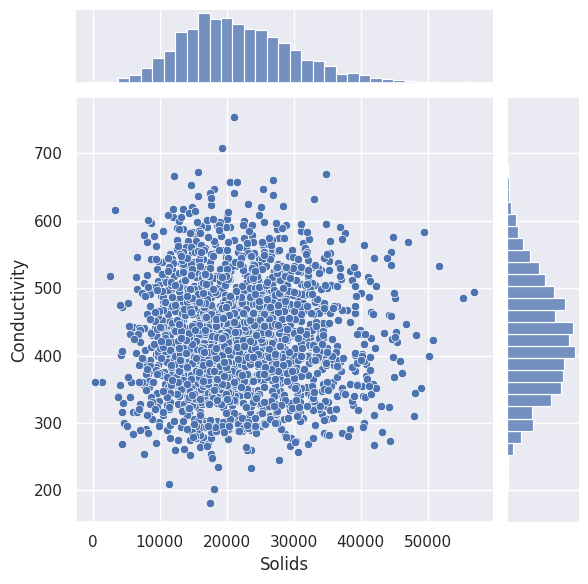

In [20]:
sns.jointplot(x=data.Solids,y=data.Conductivity)

Il n'y a pas de tendance dans ce nuage de point, il ne semble pas y avoir de corrélation entre les solides et la conductivité. 

#### 2.1.3 Visualisation des relations par paires 

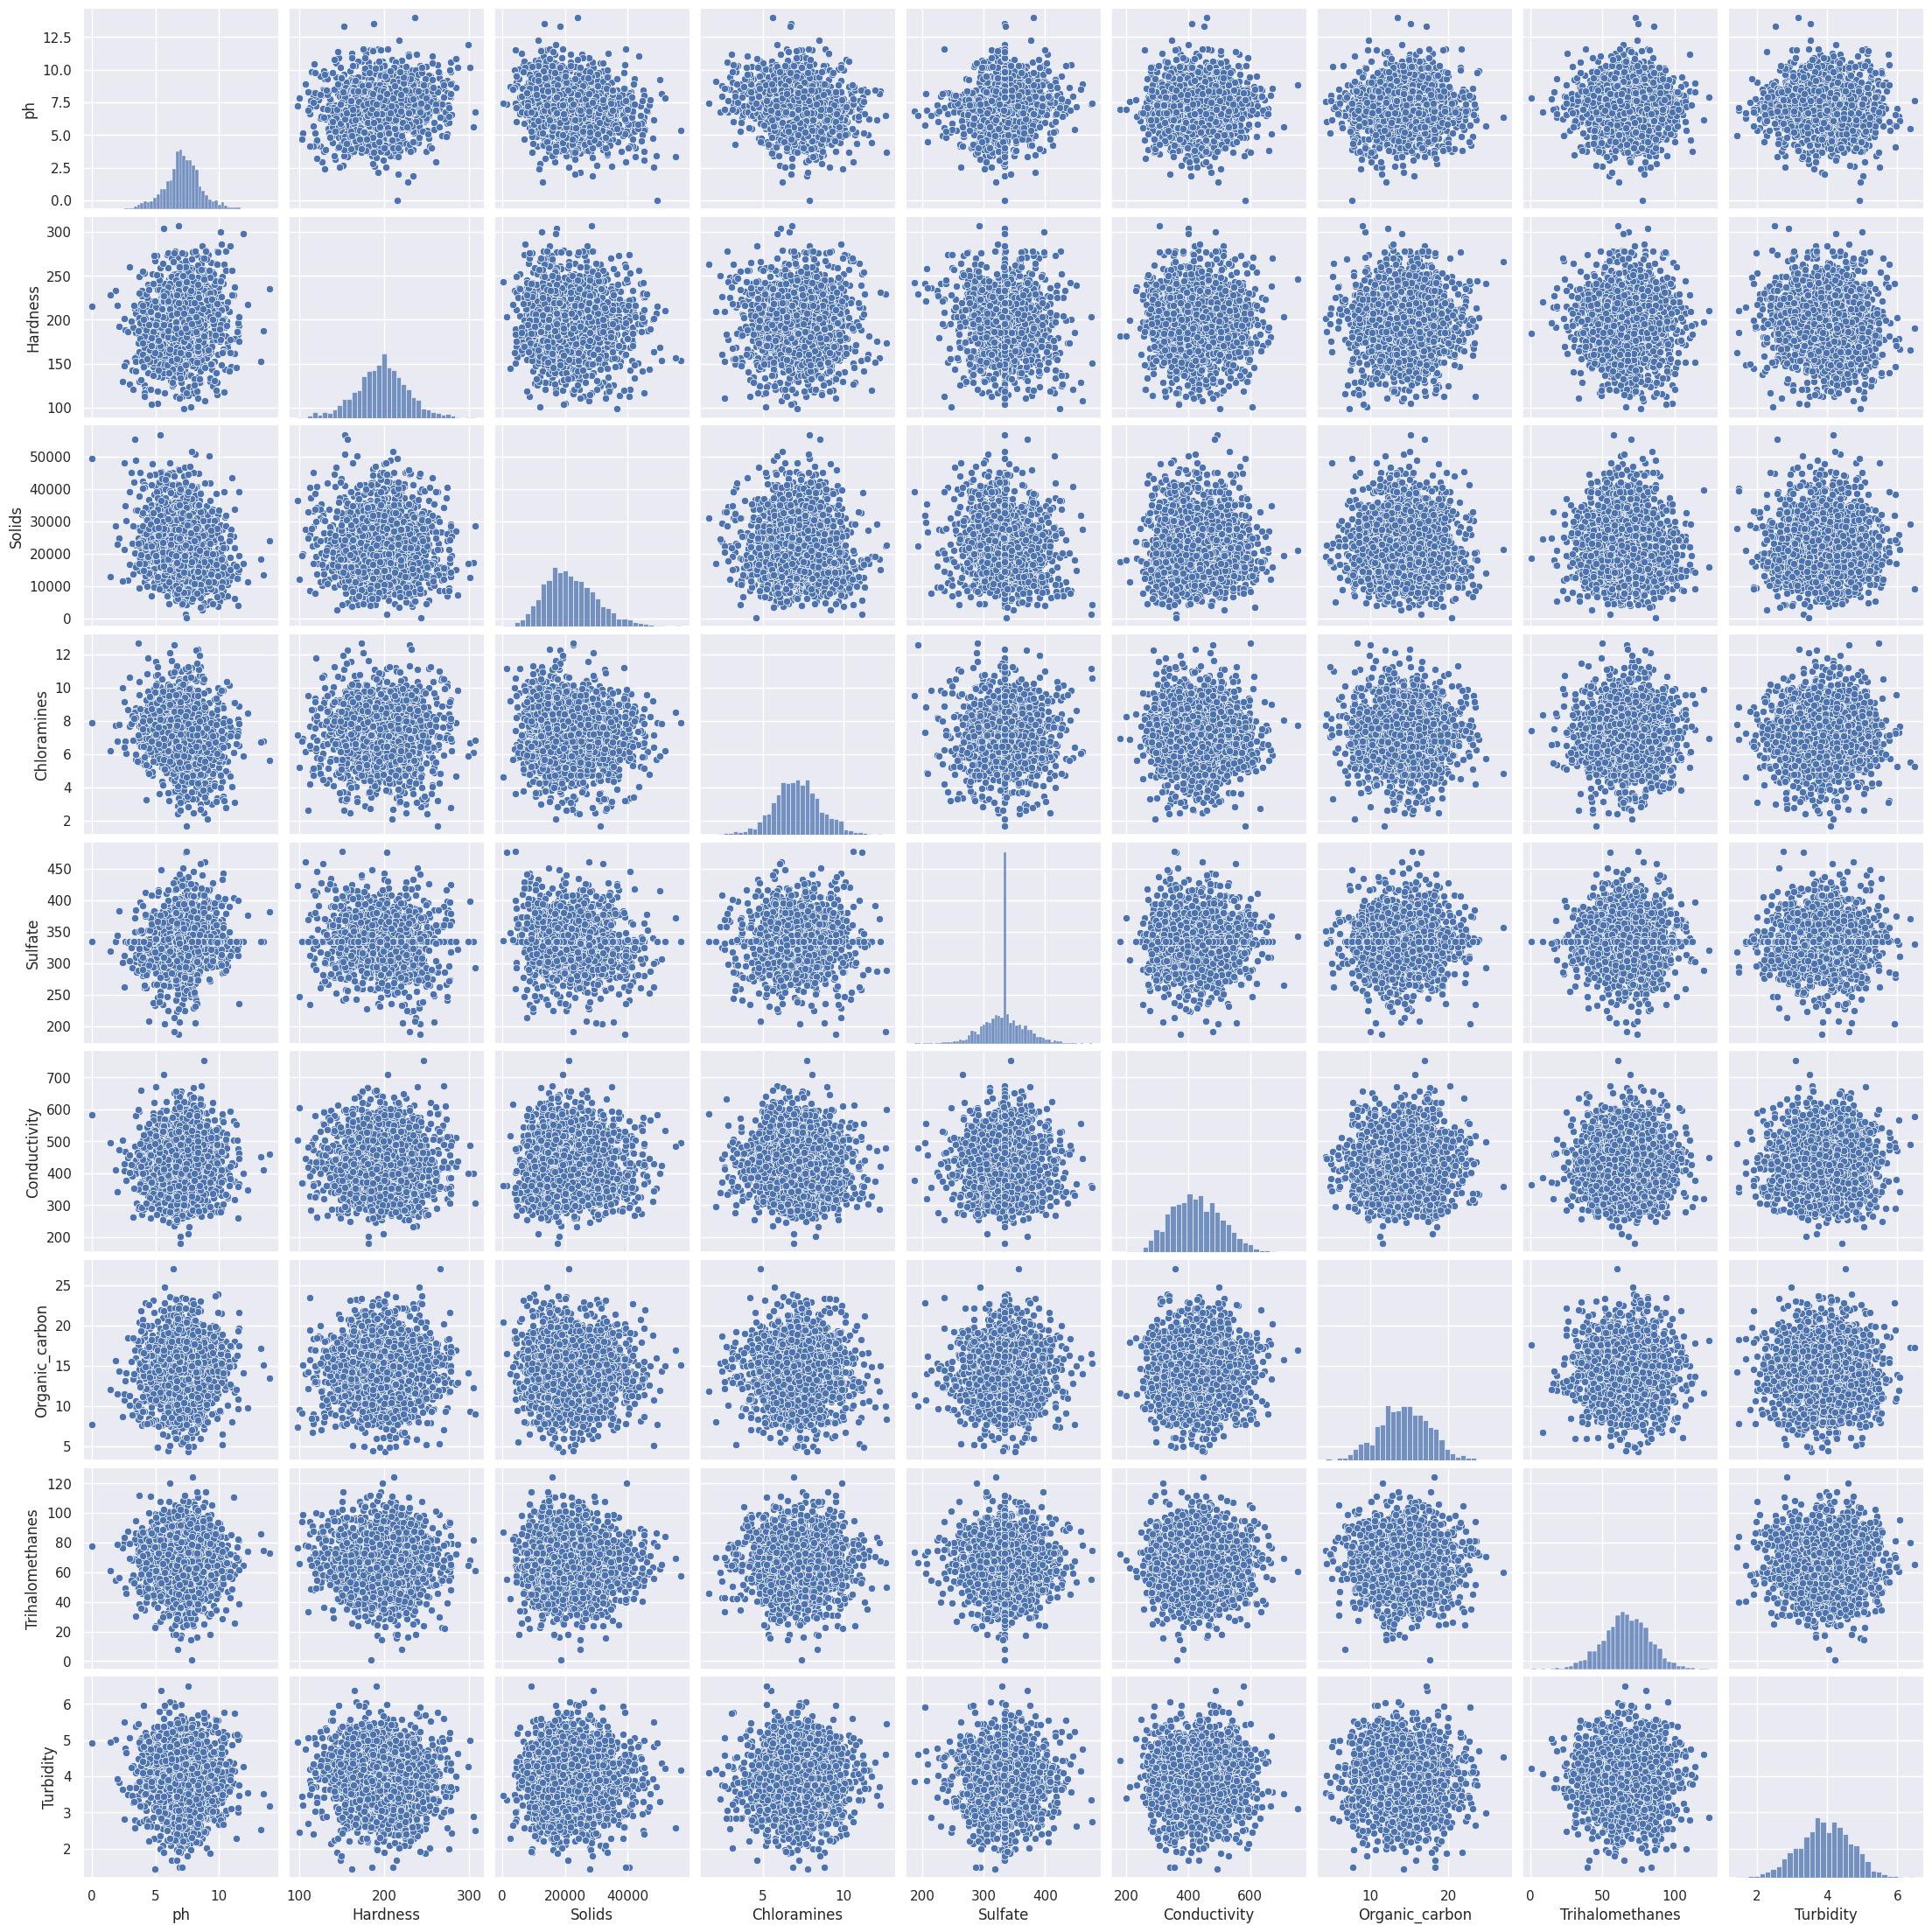

In [21]:
sns.pairplot(data, diag_kind="hist")

Ce graphique de paire visualise les relations bivariées entre les variables du jeu de données. Sur la diagonale, les histogrammes représentent la distribution de chaque variable individuelle. Les graphiques hors diagonale montrent les nuages de points pour chaque paire de variables, révélant les tendances et corrélations potentielles. 

Il semblerait qu'aucune variable ne soit corrélée. 

#### 2.1.4 Données categorielles 

Cette représentation graphique concerne les données catégorielles, dans le jeu de données, seule la variable d'intérêt est catégorielle. Cette représentation n'est pas nécessaire. 

#### 2.1.5 Heatmap 

Text(0.5, 1.0, 'Heatmap de corrélation : (water_20)')

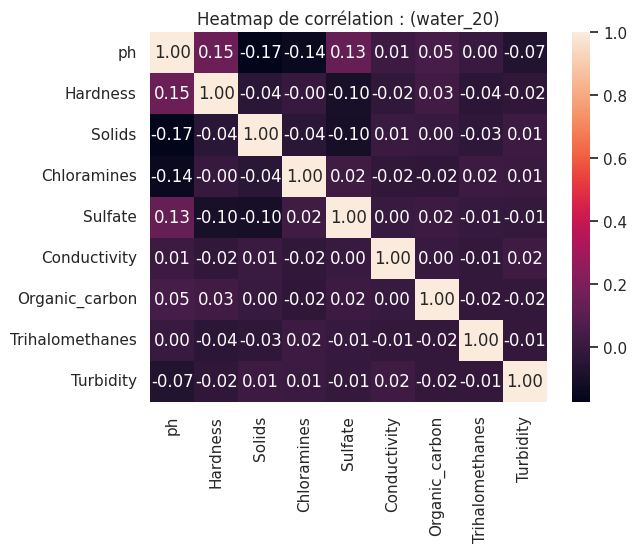

In [22]:
data_corr = data.corr()
sns.heatmap(data_corr, annot=True, fmt=".2f")
plt.title(f"Heatmap de corrélation : ({data_source})")

La heatmap de corrélation présente les coefficients de corrélation entre les différentes variables de l'ensemble de données. Les valeurs varient de -1 à 1, où 1 indique une corrélation positive parfaite, -1 une corrélation négative parfaite, et 0 l'absence de corrélation linéaire.

L'analyse révèle que les corrélations entre les variables sont globalement faibles.

Ces résultats indiquent que les variables sont relativement indépendantes les unes des autres. 

### 2.2 Analyses statistiques et descriptives  

In [23]:
# Chargement des données nettoyés
name = f"data_CV{data_cv}.csv"
data = np.genfromtxt(name, delimiter=',')

# Suppression de la première ligne de nan (représentait le nom des colonne du tableau)
data = data[~np.isnan(data).any(axis=1)]

# Servira plus tard 
water = data


In [24]:
nb_potable = np.sum(data[:, -1] == 1)
nb_non_potable = np.sum(data[:, -1] == 0)

print(f"Valeurs potables : {nb_potable}")
print(f"Valeurs non potables : {nb_non_potable}")

Valeurs potables : 508
Valeurs non potables : 1597


3 quarts des données sont des observations non-potables.

In [25]:
# Retrait de la colonne d'interet 
data = np.delete(data, 9, axis=1) 

In [26]:
print_stats(data)

Colonne ph: Moyenne = 7.16, Médiane = 7.17, Écart-type = 1.49, Valeur minimum = 0.00, Valeur maximal = 14.00
Colonne Hardness: Moyenne = 196.91, Médiane = 197.56, Écart-type = 30.66, Valeur minimum = 98.45, Valeur maximal = 306.63
Colonne Solids: Moyenne = 21866.33, Médiane = 20919.05, Écart-type = 8438.04, Valeur minimum = 320.94, Valeur maximal = 56867.86
Colonne Chloramines: Moyenne = 7.14, Médiane = 7.12, Écart-type = 1.52, Valeur minimum = 1.68, Valeur maximal = 12.65
Colonne Sulfate: Moyenne = 332.84, Médiane = 333.78, Écart-type = 33.61, Valeur minimum = 187.17, Valeur maximal = 476.54
Colonne Conductivity: Moyenne = 427.49, Médiane = 424.00, Écart-type = 80.81, Valeur minimum = 181.48, Valeur maximal = 753.34
Colonne Organic_carbon: Moyenne = 14.35, Médiane = 14.34, Écart-type = 3.32, Valeur minimum = 4.37, Valeur maximal = 27.01
Colonne Trihalomethanes: Moyenne = 66.49, Médiane = 66.66, Écart-type = 16.16, Valeur minimum = 0.74, Valeur maximal = 124.00
Colonne Turbidity: Moyen

Après nettoyage du jeu de donnée, on constate que les statistiques n'ont pas trop évolué.

#### 2.2.1 Corrélation 

In [27]:
def coef_corr(tableau):
    """
    Calcule et affiche les coefficients de corrélation significatifs entre les colonnes d'un tableau.
    Enregistre également les coefficients de corrélation dans un fichier CSV.

    Args:
        tableau (numpy.ndarray): Tableau contenant les données à analyser.
    """
    for col1 in range(tableau.shape[1]):
        for col2 in range(tableau.shape[1]):
            if col1 != col2:
                correlation = np.corrcoef(tableau[:, col1], tableau[:, col2])[0, 1]
                if (-1 < correlation < -0.5) or (0.5 < correlation < 1):
                    print(f"{colnames[col1]} et {colnames[col2]} sont fortement corrélés.")
                with open('correlation_coefficients.csv', 'a') as f:
                    f.write(f"{colnames[col1]},{colnames[col2]},{correlation}\n")

coef_corr(data)

Il s'agit d'une autre façon de calculer les coefficients de corrélation entre les colonnes, les résultats sont les mêmes que ce présenté précédemment. Les différentes variables ne sont pas corrélées.


#### 2.2.2 Identification des règles d'agglomérations 

### 2.3 Agglomeration 

#### 2.3.1 Clustering - Classification non supervisée 


Que ce soit pour les méthodes de classification ou les méthodes de prédiction, il est nécessaire de normaliser les données afin que, au cours des analyses, chaque valeur ait le même poids.

In [28]:
## Normalisation 
from sklearn.preprocessing import StandardScaler

object= StandardScaler()
data_norm = object.fit_transform(data)
data_norm

np.savetxt('water_norm.csv', data_norm, delimiter=",", header=",".join(colnames[:-1]), comments='')

La distance de Minkowki est une généralisation des distances euclidienne et manhattan. Elle est définie par une formule qui inclut un paramètre p.

Pour p = 2, elle est équivalente à la distance euclidienne, lorsque p = 1 elle est équivalente à la distance Manhattan. 

In [29]:
from scipy.spatial import distance

observation1 = data_norm[0, :]
observation2 = data_norm[1, :]

eucli = distance.euclidean(observation1, observation2)
manha = distance.cityblock(observation1, observation2)
mink = distance.minkowski(observation1, observation2)

cov_matrix = np.cov(data_norm, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix, )
mahala = distance.mahalanobis(observation1, observation2, inv_cov_matrix)


print(f"La distance euclidienne : {eucli:.2f}")
print(f"La distance Manhattan : {manha:.2f}")
print(f"La distance Minkowski : {mink:.2f}")
print(f"La distance Mahalanobis : {mahala:.2f}")


La distance euclidienne : 5.50
La distance Manhattan : 13.13
La distance Minkowski : 5.50
La distance Mahalanobis : 5.36


La distance de Manhattan est généralement plus grande que la distance euclidienne. Ici, nous avons une distance équivalente entre les distances euclidienne, Minkowski (avec p = 2 ), et Mahalanobis.

Selon les graphiques précédent les variables présentent une distribution normale, en générale la distance euclidienne et approprié pour ce type de variable. 
Cependant, nous allons tester les différentes distances pour pouvoir les comparer.

**Définition du seuil pour la classification hiérarchique**

Pour déterminer le seuil de distance à utiliser dans la classification hiérarchique, la moyenne des matrices de chaque type de distance a été calculée.

In [30]:
from sklearn.metrics import pairwise_distances

metrique = ["euclidean", "manhattan", "mahalanobis"]

cov_matrix = np.cov(data_norm, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

metrique = ["euclidean", "manhattan", "mahalanobis"]
for met in metrique : 
    if met == "mahalanobis":
        distance_matrix = pairwise_distances(data_norm, metric=met, VI=inv_cov_matrix)
    else:
        distance_matrix = pairwise_distances(data_norm, metric=met)
    print(f"{met} : Moyenne = {distance_matrix.mean():.2f}")

euclidean : Moyenne = 4.10
manhattan : Moyenne = 10.02
mahalanobis : Moyenne = 4.10


La moyenne calculée est de 4,10 pour la distance euclidienne et la distance de Mahalanobis, ce qui justifie la fixation d'un seuil à 4,10. Pour la distance de Manhattan, la moyenne est de 10,02, ce qui conduit à la fixation d'un seuil à 10,02. L'utilisation d'un seuil proche de la moyenne permet de regrouper les points proches les uns des autres tout en séparant les points les plus éloignés.

**La classification hierarchique**
La fonction `plot_dendrogram` vient de : https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

In [31]:
# Ajout de la variable d'Interet 
indices = ~np.isnan(water).any(axis=1)
potability = water[indices, 9]

last_column_labels = np.where(potability == 0, 0, 1).reshape(-1, 1)

water_norm_pota = np.hstack((data_norm[indices, :], last_column_labels))

Pour la suite des analyses, le jeu de données sera séparé en sous-ensembles d'apprentissage et de test. Bien que cela ne soit pas indispensable pour le clustering, il semble pertinent, dans le but de comparer les outils, de travailler sur les mêmes données afin de ne pas inclure de biais.

In [32]:
from sklearn.model_selection import train_test_split

target = water_norm_pota[:, -1].astype(int)
train_data = water_norm_pota[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=10)

Classification hierarchique avec la distance euclidean au seuil 4
Nombre de clusters formé 188


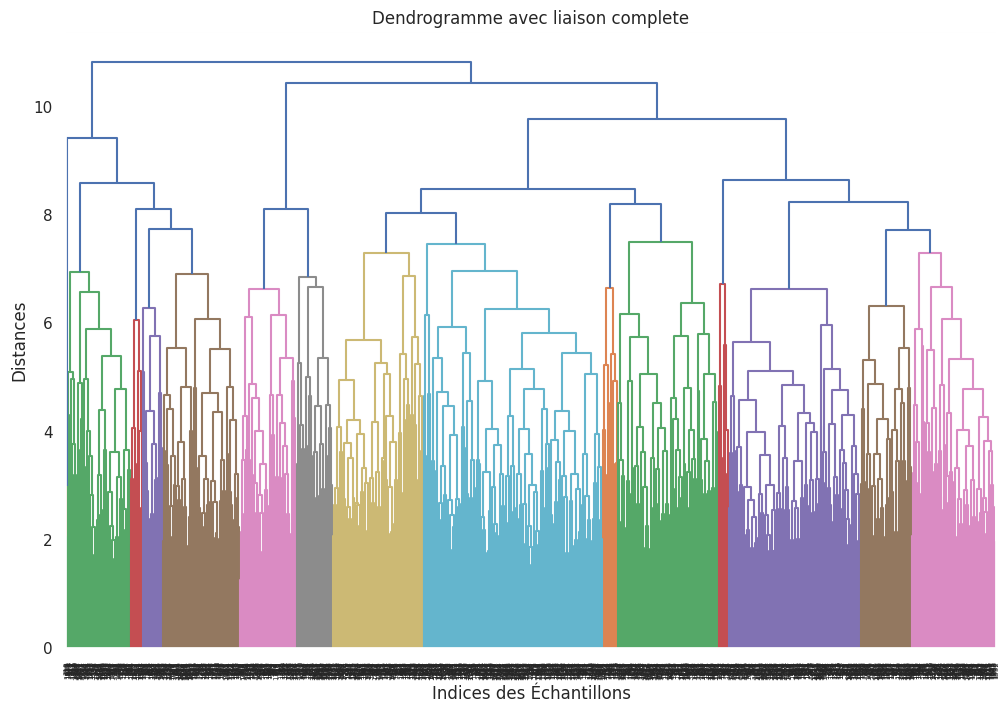

Classification hierarchique avec la distance euclidean au seuil 4
Nombre de clusters formé 54


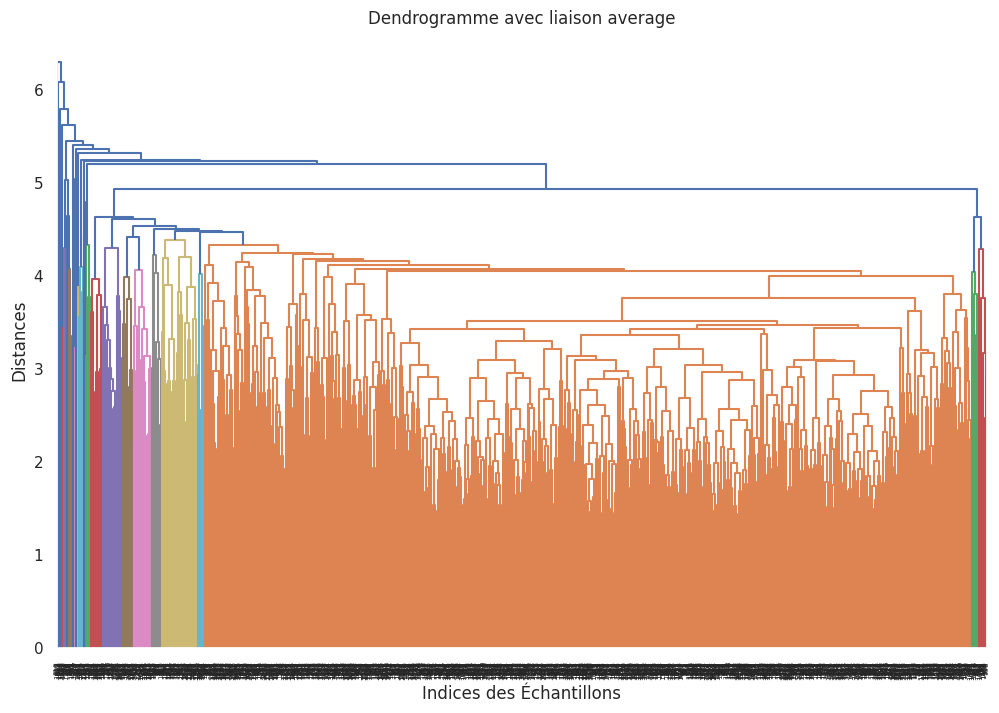

Classification hierarchique avec la distance euclidean au seuil 4
Nombre de clusters formé 1


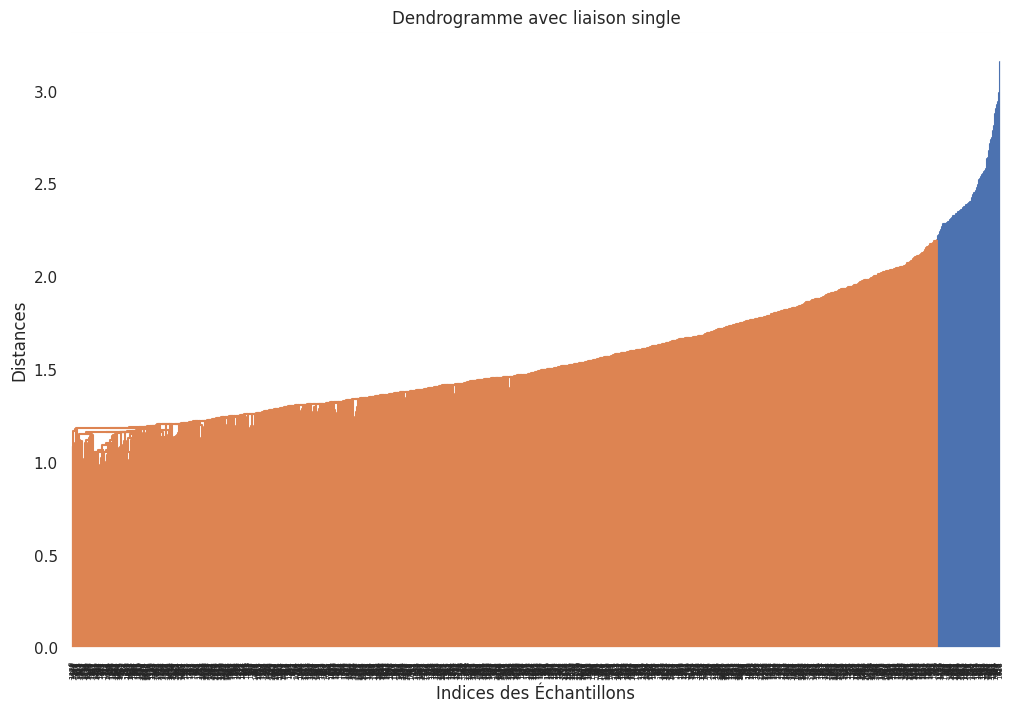

Classification hierarchique avec la distance manhattan au seuil 10
Nombre de clusters formé 182


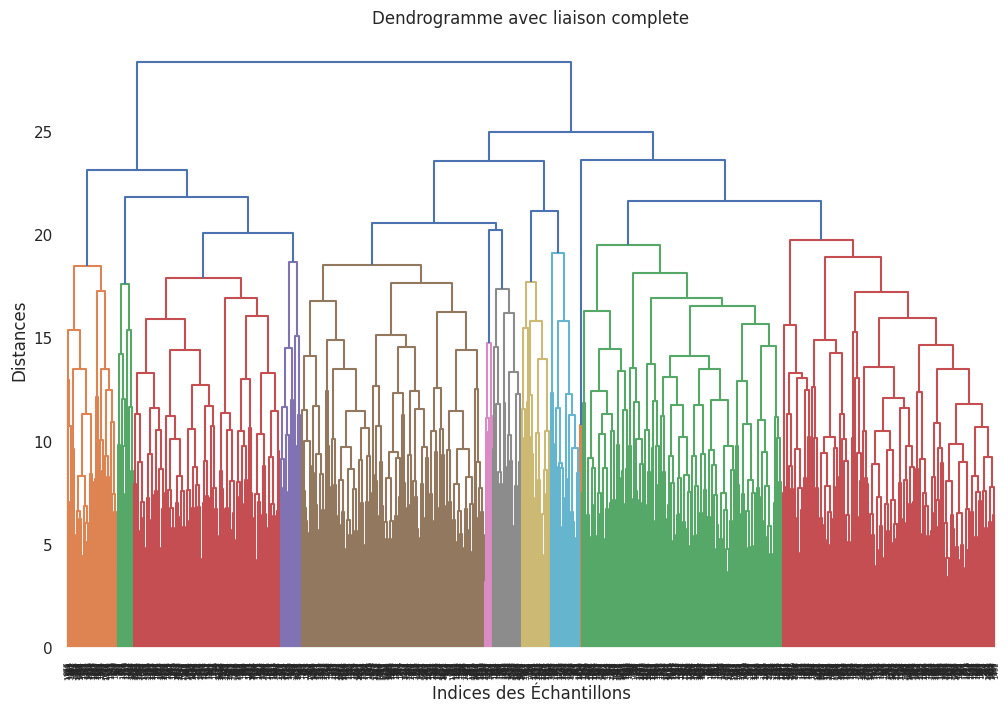

Classification hierarchique avec la distance manhattan au seuil 10
Nombre de clusters formé 46


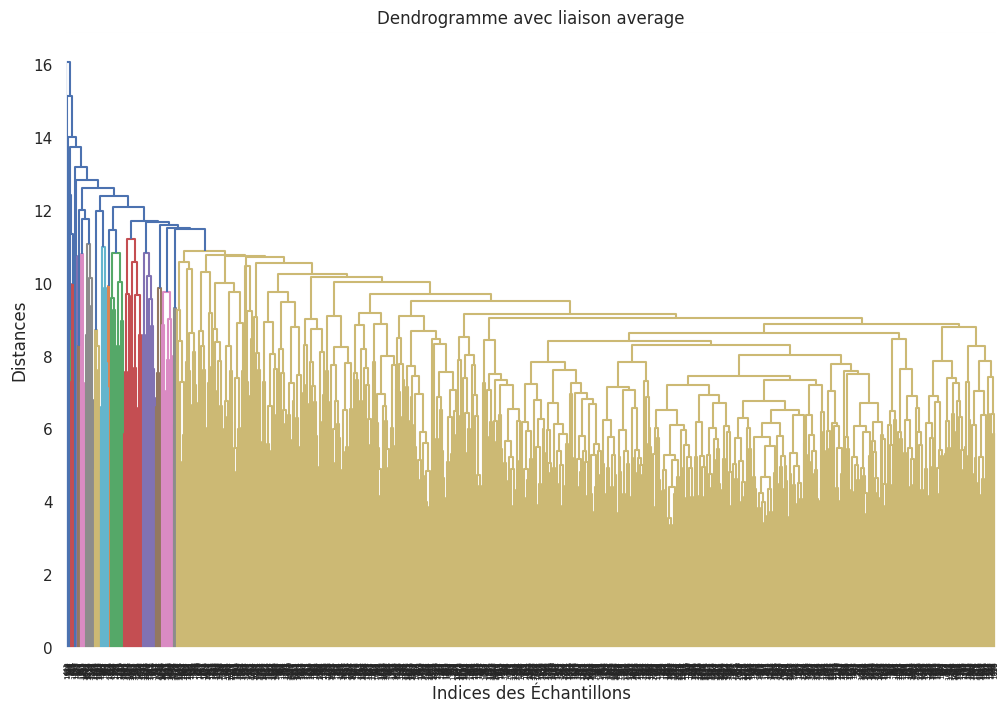

Classification hierarchique avec la distance manhattan au seuil 10
Nombre de clusters formé 1


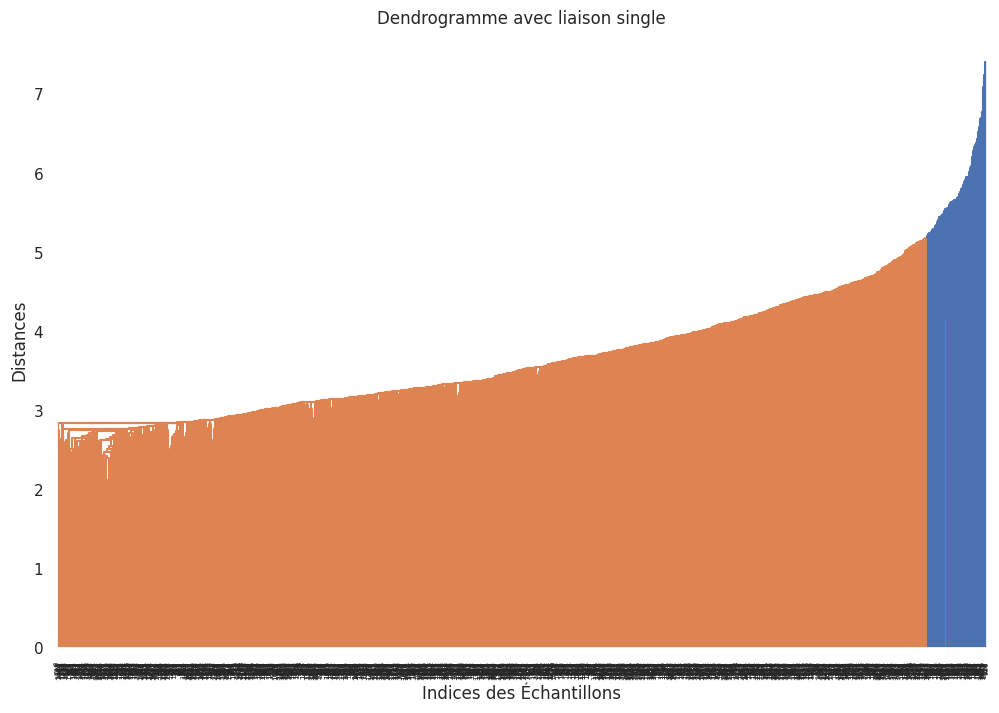

In [33]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

linkage = ["complete","average", "single"]
seuil = [4, 10]

for i in range(len(metrique)-1) : 
    for link in linkage : 
        print(f"Classification hierarchique avec la distance {metrique[i]} au seuil {seuil[i]}")
        cluster = AgglomerativeClustering(
            metric=metrique[i],
            linkage=link,
            distance_threshold=seuil[i],
            n_clusters=None,
            ).fit(X_train)
        
        labels = cluster.labels_
        nb_clusters = np.unique(labels).shape[0]
        print(f'Nombre de clusters formé {nb_clusters}')
        plt.figure(figsize=(12, 8)) 
        plot_dendrogram(cluster)
        plt.title(f'Dendrogramme avec liaison {link}')
        plt.xlabel('Indices des Échantillons')
        plt.ylabel('Distances')
        plt.show()




Les graphiques présentés ci-dessus sont des dendrogrammes, obtenus à partir d'une classification hiérarchique. Ces dendrogrammes ont été construits en utilisant différentes distances (euclidienne et Manhattan), divers seuils (4 et 10) et trois méthodes de liaison distinctes :

- **Complete linkage** : Calcule la distance entre deux clusters en considérant la distance maximale entre deux points appartenant à chacun des clusters.
- **Average linkage** : Ici, la distance entre deux clusters est définie comme la moyenne des distances entre chaque point du premier cluster et chaque point du second cluster.
- **Single linkage** : Utilise la distance minimale entre deux points appartenant à deux clusters pour déterminer la distance entre ces clusters.

Avec un seuil de 4 et en utilisant la distance euclidienne :
- La liaison complète a produit 188 clusters.
- La liaison moyenne a généré 54 clusters.
- La liaison simple a formé 1 cluster.

Sur un total de 1684 observations.

En utilisant la distance de Manhattan et un seuil de distance de 10, 182, 46 et 1 clusters ont été formés respectivement.

Les différences dans le nombre de clusters formés par chaque méthode de liaison suggèrent que les données présentent une structure complexe. En effet, pour un même seuil, le nombre de clusters varie considérablement.

L'objectif est de discriminer l'eau potable de l'eau non-potable, 2 groupes étaient attendus. 

Pour la suite des tests, la distance euclidienne sera utilisé, car elle est recommandée pour les variables distribuées normalement et non corrélées entre elles. 

In [34]:
cluster = AgglomerativeClustering(
        metric="euclidean",
        linkage='complete',
        distance_threshold=seuil[0],
        n_clusters=None
        ).fit(X_train)

# Sterilisation du fichier 
with open ("AHC_complete.pkl", 'wb') as fichier : 
    pickle.dump(cluster, fichier)

**K-means**

Les différents paramètres : 
- `n_clusters` : Le nombre de clusters à former (= K)
    - Le jeu de données fournit des informations sur la qualité des données pour discriminer l'eau potable de l'eau non potable. Par conséquent, deux classes sont attendues. La fourchette du nombre de clusters sera donc centrée autour de 2.
- `init` : Méthode d'initialisation des centroïdes.
    - Utilisation de k-means++ car cela augmente la convergence 
- `n_init` : Nombre d'exécutions de l'algorithme K-means avec différentes graines
    - Utilisation de "auto" pour permettre à l'algorithme de déterminer le nombre optimal d'itérations.
- `max_iter` : Nombre maximum d'itérations de l'algorithme K-means pour une seule exécution.
    - On laisse le nombre d'itération par default, soit 300 

Adapatation du script : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


For n_clusters = 2 The average silhouette_score is : 0.08803918506254066
For n_clusters = 3 The average silhouette_score is : 0.07590107356097825
For n_clusters = 4 The average silhouette_score is : 0.0760366527211989


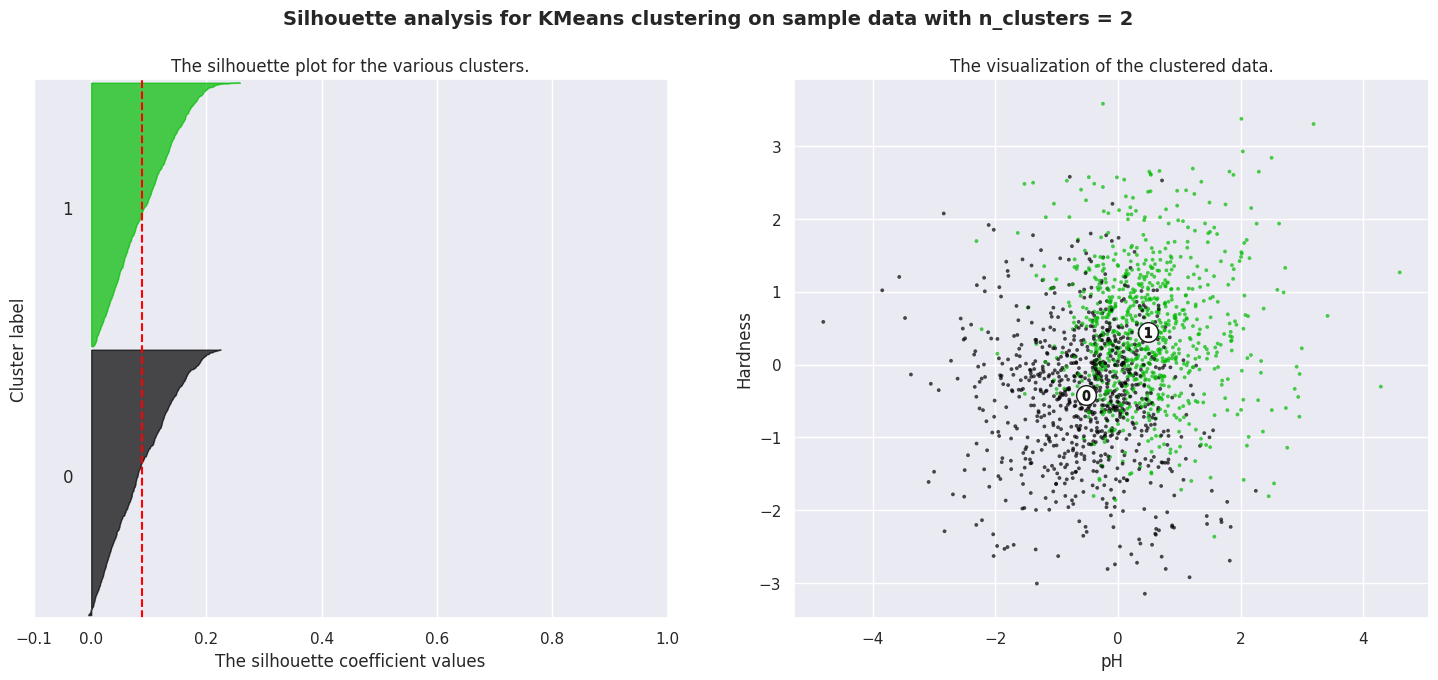

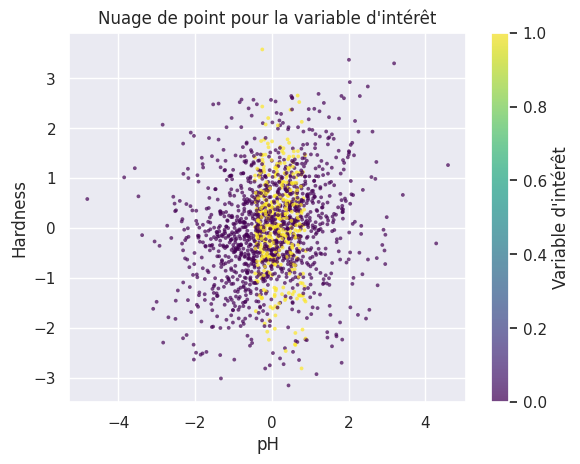

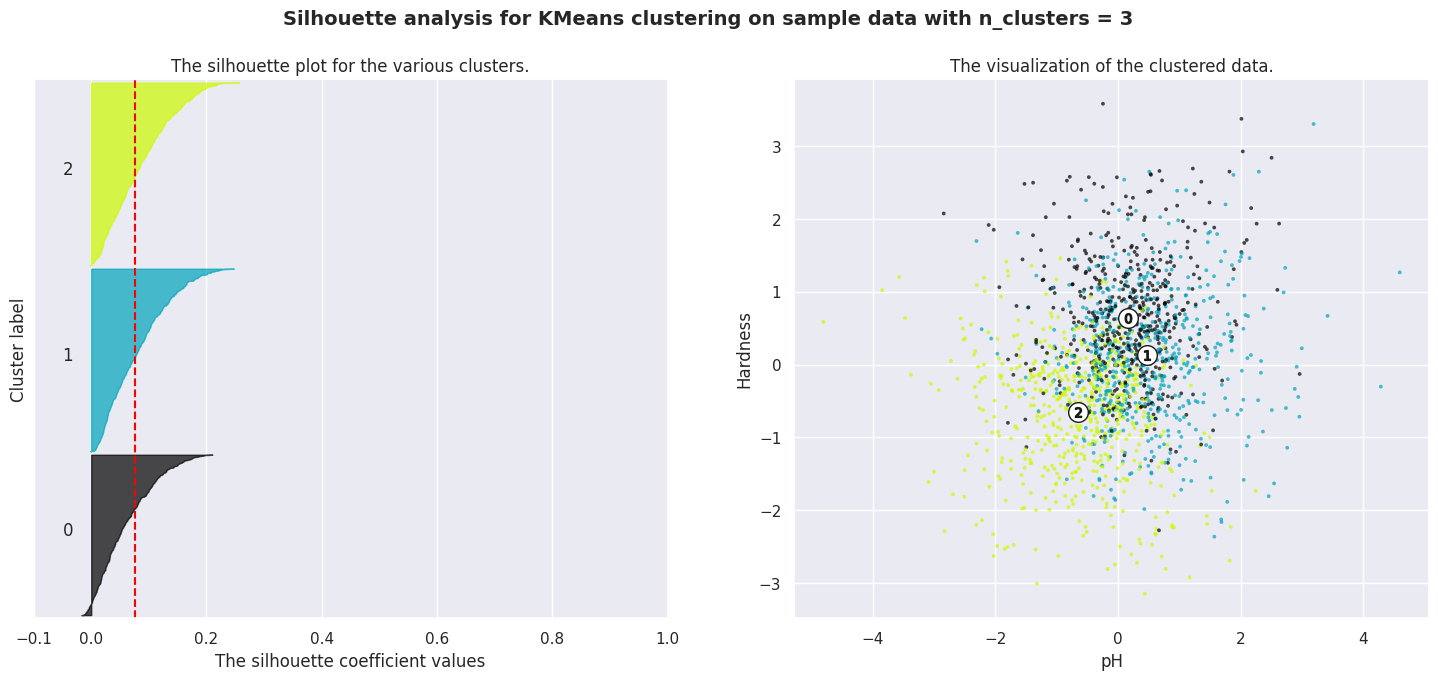

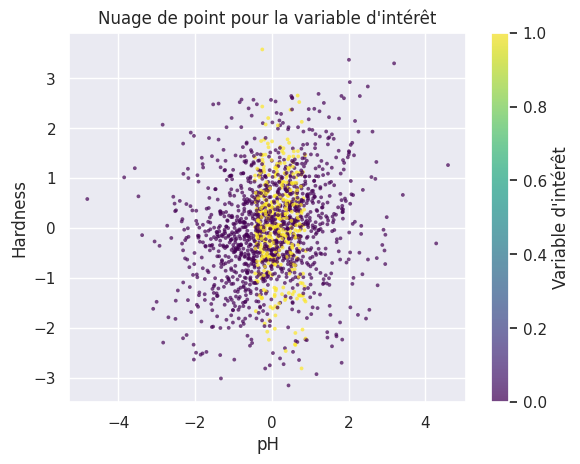

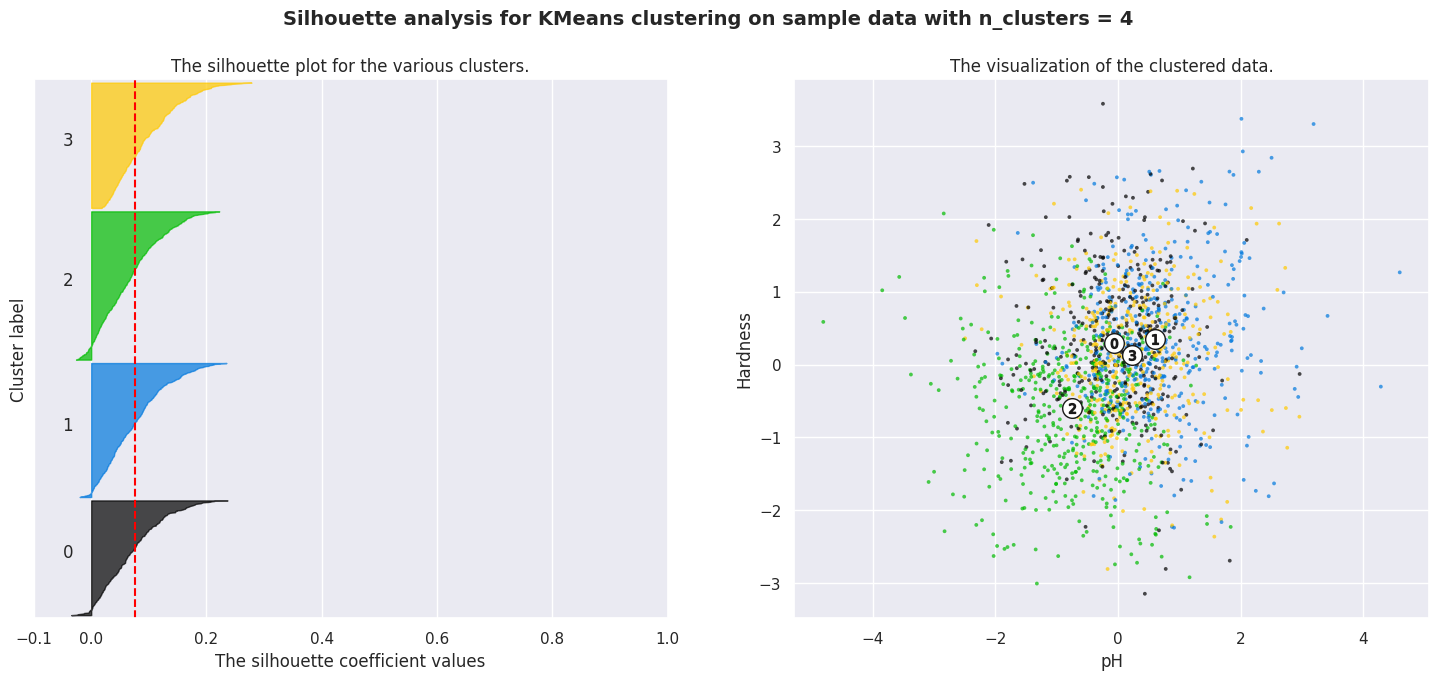

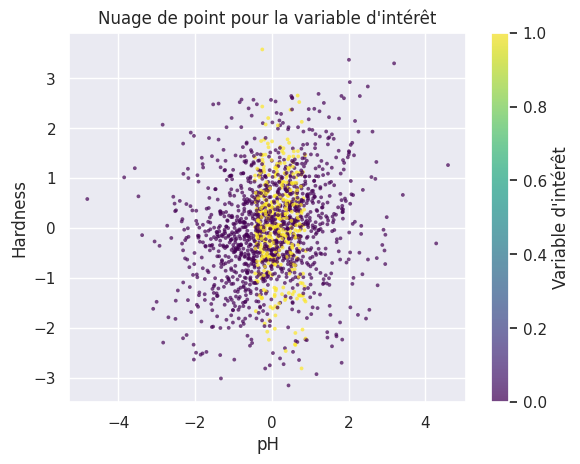

In [35]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm



range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_train[:, 0], X_train[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("pH")
    ax2.set_ylabel("Hardness")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    # Figure avec la variable d'interet
    plt.figure()
    plt.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker=".", s=30, lw=0, alpha=0.7, edgecolor="k"
    )
    plt.title("Nuage de point pour la variable d'intérêt")
    plt.xlabel("pH")
    plt.ylabel("Hardness")
    plt.colorbar(label="Variable d'intérêt")

plt.show()

Ces graphiques présente une analyse de silhouette pour évaluer la qualité de clustering Kmeans avec 2, 3 et 4 clusters. Chaque figure se compose de deux parties complémentaires :

- La partie gauche, un graphique de silhouette. Cette section affiche les coefficients de silhouette pour chaque point de données, organisés par cluster. Chaque silhouette représente la distribution de ces coefficients au sein d'un cluster donné. Un coefficient proche de 1 indique une forte similarité du point avec son cluster, suggérant une bonne assignation. Inversement, un coefficient proche de -1 signale une mauvaise assignation, le point étant plus similaire à un autre cluster.
- La partie droite, la visualisation des clusters. Cette partie permet de visualiser la répartition des clusters formés par l'algorithme KMeans.
En dessous, est affiché un nuage de point avec les classes potable ou non-potable réelle.

Les résultats de l'analyse de silhouette révèlent que, quel que soit le nombre de clusters choisi, les scores de silhouette moyens sont très faibles et proches de zéro. Cela indique que les points sont mal définis au sein de leurs clusters et qu'il existe un chevauchement important entre les clusters.

- Pour 2 clusters, le score de silhouette moyen est de 0.088.
- Pour 3 clusters, le score de silhouette moyen est de 0.075.
- Pour 4 clusters, le score de silhouette moyen est de 0.076.

Ces scores faibles suggèrent que de nombreux points de données se trouvent à la limite entre les clusters, ce qui rend leur attribution incertaine. En examinant les graphiques de silhouette, on constate que la plupart des silhouettes sont courtes et épaisses, avec parfois des valeurs négatives, ce qui confirme la présence de points mal classés.

La visualisation des clusters renforce cette observation en montrant un chevauchement important entre les points de données des différents clusters. Il n'y a pas de séparation claire entre les groupes, et les clusters ne forment pas de groupes distincts et compacts. 
Une classification semble compliquée pour ces données, car même sur la figure des données réelles, il n'y a pas de séparation claire entre les 2 groupes. 

In [36]:
from sklearn import metrics

clusterer = KMeans(n_clusters=2, random_state=10)
mod = clusterer.fit(X_train)

# Sterilisation du fichier 
with open ("K-means_2.pkl", 'wb') as fichier : 
    pickle.dump(mod, fichier)

**SOM**

Les différents paramètres : 
- Afin de déterminer les dimensions `x` et `y` de la grille SOM, la règle empirique a été appliquée.
    - Le jeu de données d'entraînement est composé de 1684 observations. Suite à l'application de la règle empirique, il a été estimé qu'environ 206 neurones étaient nécessaires.
    - Afin d'explorer différentes configurations, les dimensions de grille suivantes ont été testées : 14x14 (196 neurones), 14x15 (210 neurones) et 17x12 (204 neurones).
    - La grille SOM peut etre carré ou rectangle les dimension suivant vont etre testé : 14x14 (196 neurones), 14x15 (210 neurones) et 17x12 (204 neurones)
- `input_len` : Le vecteur d'entrée est composé de 9 éléments, correspondant aux 9 variables explicatives du jeu de données. La variable cible a été exclue.
- Les paramètres par défaut de la bibliothèque SOM ont été utilisés pour tous les autres réglages.

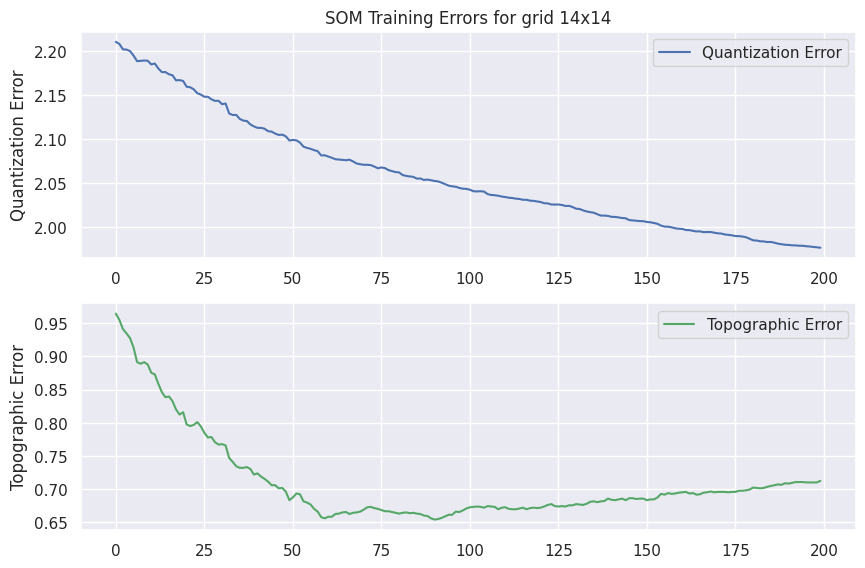

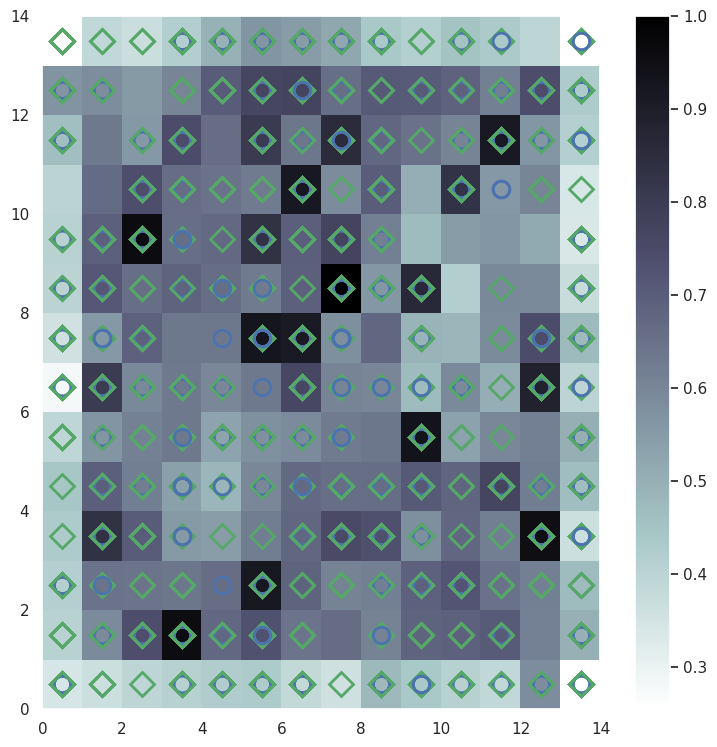

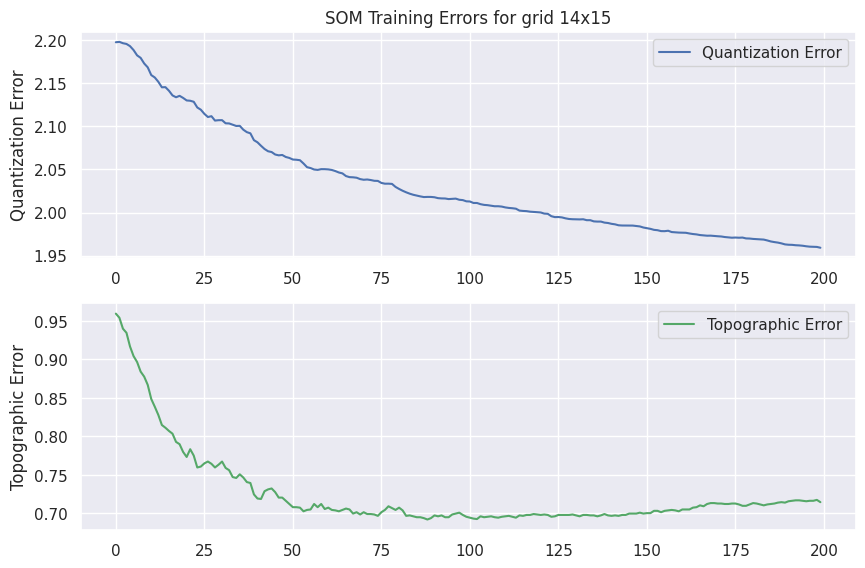

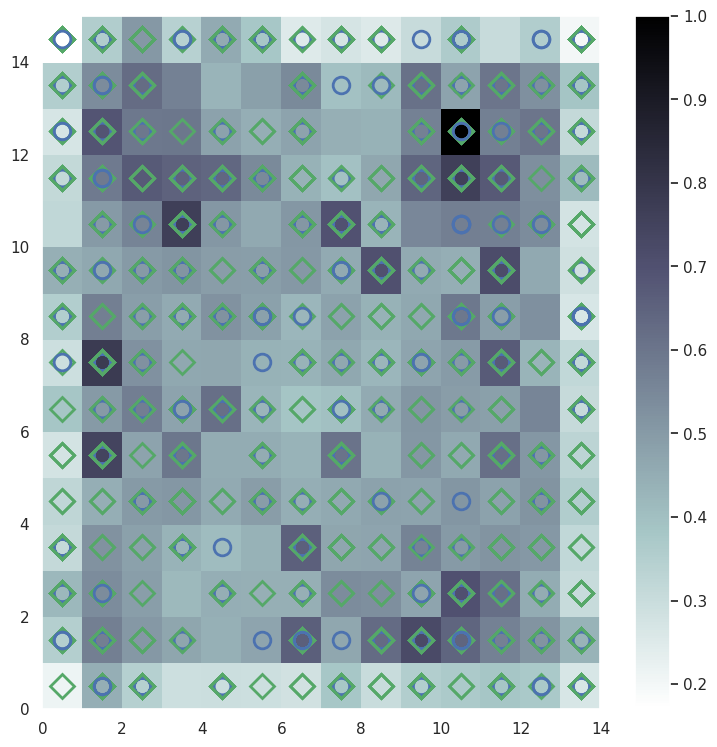

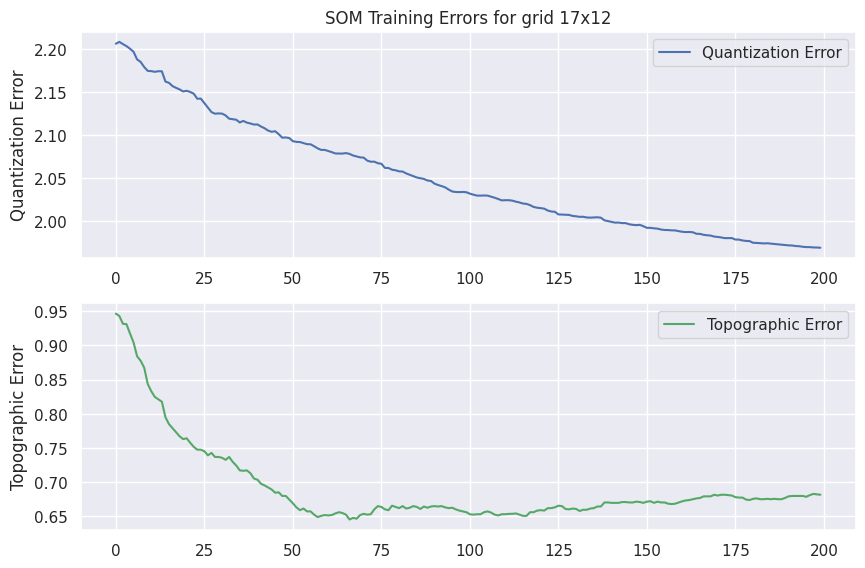

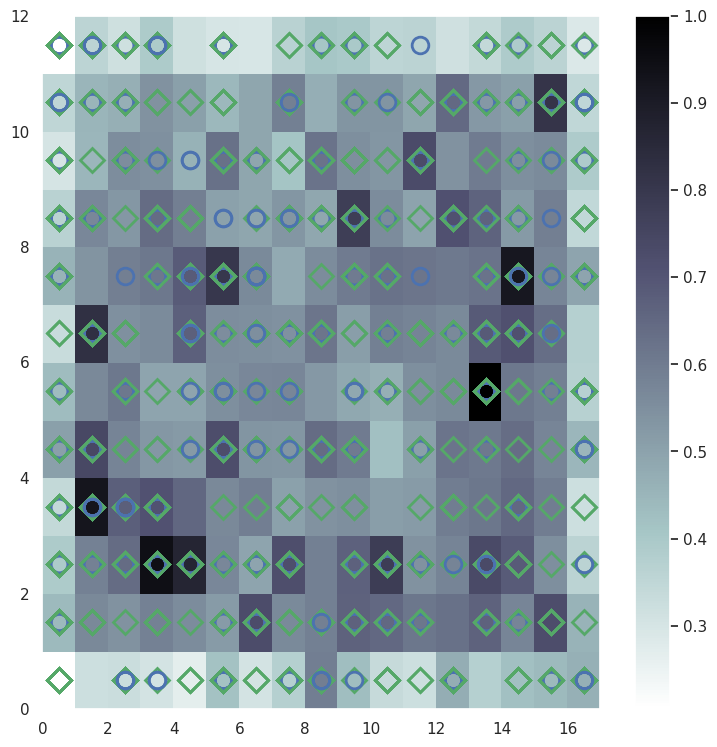

In [37]:
from minisom import MiniSom 

modalites = [
    {'x': 14, 'y': 14},
    {'x': 14, 'y': 15},
    {'x': 17, 'y': 12}
]

for mod in modalites: 
    som = MiniSom(x=mod['x'], y=mod['y'], input_len=X_train.shape[1], random_seed=10)

    max_iter = 200
    q_error = []
    t_error = []
    d_error = []

    for i in range(max_iter):
        rand_i = np.random.randint(len(X_train))
        som.update(X_train[rand_i], som.winner(X_train[rand_i]), i, max_iter)
        q_error.append(som.quantization_error(X_train))
        t_error.append(som.topographic_error(X_train))

    plt.figure(figsize=(10, 10)) 
    plt.subplot(3, 1, 1)
    plt.plot(np.arange(max_iter), q_error, label='Quantization Error', color='b')
    plt.title(f'SOM Training Errors for grid {mod["x"]}x{mod["y"]}')
    plt.ylabel('Quantization Error')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(np.arange(max_iter), t_error, label='Topographic Error', color='g')
    plt.ylabel('Topographic Error')
    plt.legend()

    plt.figure(figsize=(9, 9))
    plt.pcolor(som.distance_map().T, cmap='bone_r')
    plt.colorbar()
    markers = ['o', 's', 'D']
    colors = ['C0', 'C1', 'C2']
    for cnt, xx in enumerate(X_train):
        w = som.winner(xx)
        plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
                 markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)
    plt.show()


Les graphiques ci-dessus illustrent l'évolution de 2 métriques durant l'entraînement de la SOM :

- L'erreur de quantification, plus cette erreur est faible, plus la représentation des données par la SOM est précise. Elle mesure la distance moyenne entre les vecteurs d'entrée et les neurones gagnants.
- L'erreur topographique, une faible erreur indique que la SOM a bien préservé les relations topologiques des données, c'est-à-dire la structure des données d'entrée.

Sous les courbes des trois métriques, une représentation graphique de la SOM est présentée.

Pour les trois grilles testées (14x14, 14x15 et 17x12), les graphiques montrent une tendance générale à la diminution des erreurs au fil des itérations d'entraînement. Cela confirme que la SOM apprend progressivement à mieux représenter les données.

Cependant, bien que la tendance soit à la baisse, l'échelle de chacune des erreurs demeure élevée. Ceci est confirmé par la U-matrix, où la présence des deux symboles représentant les classes (potable et non potable) dans de nombreuses cellules de la SOM suggère une séparation imparfaite des classes.

Parmi les 3 grilles aucune ne sort de du lot 


#### 2.3.2 Classification supervisées 

**K-Plus proche voisins**

Les différents paramètres : 
- `n_neighbors` : Pour déterminer le bon nombre de K nous allons réaliser une méthode de validation croisée
- `weights` : Les 2 distances ont été testé et cela fonctionnait mieux avec un point uniforme (Valeur par default)
- `metric` : Toujours euclidienne pour l'obtenir nous devons laisser la metric minkowski par default avec p = 2 (Valeur par default également)

Adapatation du script : https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn



In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)



Accuracy: 0.7767220902612827
Precision: 0.5365853658536586


**Différence accuracy et precision :** L'accuracy prend en compte toutes les prédictions, qu'elles soient positives ou négatives, alors que la précision se concentre uniquement sur la proportion de prédictions positives correctes. 

Sans ajustements des paramètres, une accuracy de 78 % et une précision de 54 % ont été atteintes avec la méthode des k plus proches voisins sur le jeu de données de test.

Bien que l'accuracy soit satisfaisante, elle peut être trompeuse en présence de classes déséquilibrées. C'est ce que nous observons dans ce jeu de données, où environ 3 quarts des observations représentent des échantillons d'eau non potable.

Text(0, 0.5, 'Accuracy Score')

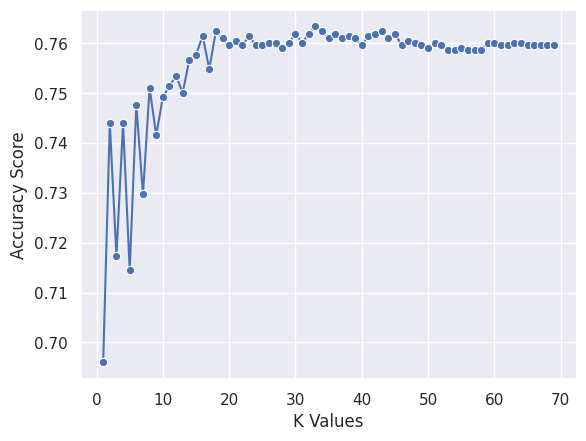

In [39]:
from sklearn.model_selection import cross_val_score

# Amélioration du score 
k_values = [i for i in range (1,70)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, train_data, target, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

Le paramètre `cv=5` indique qu'une validation croisée à 5 plis est utilisée. Cela signifie que les données seront divisées en 5 parties, et le modèle sera entraîné et testé 5 fois, chaque fois avec une partie différente des données utilisée comme ensemble de test et les autres parties comme ensemble d'entraînement.

In [40]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
mod = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)

print("Best K : ", best_k)
print("Accuracy:", accuracy)
print("Precision:", precision)

Best K :  33
Accuracy: 0.7672209026128266
Precision: 0.5833333333333334


La validation croisée a permis d'identifier un nombre de voisins K qui donne une bonne accuracy tout en améliorant la précision. 

In [41]:
# Sterilisation du fichier 
with open ("KNN.pkl", 'wb') as fichier : 
    pickle.dump(mod, fichier)

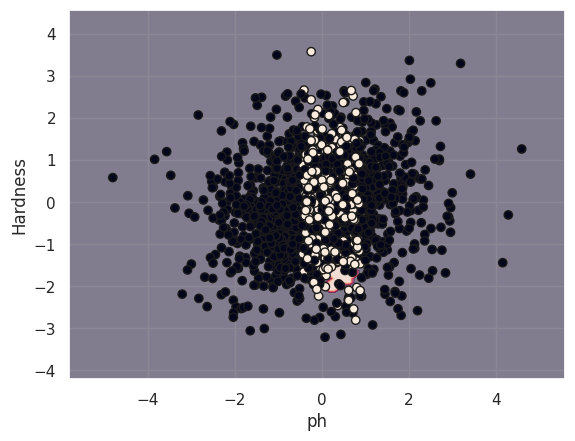

In [42]:
from sklearn.inspection import DecisionBoundaryDisplay

knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(train_data[:, :2], target)

disp = DecisionBoundaryDisplay.from_estimator(
    knn, train_data[:, :2], response_method="predict", alpha=0.5
)
disp.ax_.scatter(train_data[:, 0], train_data[:, 1], c=target, edgecolor="k")
plt.xlabel(colnames[0])
plt.ylabel(colnames[1])
plt.show()

Ce graphique présente la frontière de décision obtenue par un modèle k-NN avec k=33, appliqué aux variables "ph" et "dureté".

La couleur des points indique la classe de chaque point de données : blanc pour l'eau potable et noir pour l'eau non potable. Les zones colorées en arrière-plan représentent les régions où le modèle prédit une classe particulière. La zone rouge correspond à la classe "eau potable".

La présence d'une petite zone colorée et la superposition des points noirs et blancs indiquent que le modèle k-NN a des difficultés à séparer les classes de manière nette.

**Random Forest**

Adaptation du script : https://www.datacamp.com/fr/tutorial/random-forests-classifier-python


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(max_depth=2, random_state=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7624703087885986


Le random forest avec les paramètres par défauts donne une bonne accuracy

Pour améliorer le modèle, RandomizedSearchCV a été utilisé pour optimiser les hyperparamètres. 

In [44]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1e7046bb50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1e6f0d0730>})

In [45]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 391}


Les meilleurs estimateurs trouvés sont max_depth: 7 et n_estimators: 391

In [46]:
clf = RandomForestClassifier(max_depth=7,n_estimators=391, random_state=10)
mod = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7909738717339667


Après optimisation du modèle, l'accuracy est proche des 80 % 

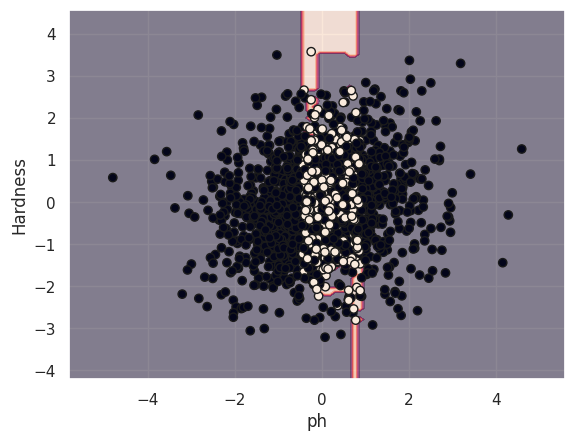

In [47]:

clf = RandomForestClassifier(max_depth=7,n_estimators=391, random_state=10)
clf.fit(train_data[:, :2], target)

disp = DecisionBoundaryDisplay.from_estimator(
    clf, train_data[:, :2], response_method="predict", alpha=0.5
)
disp.ax_.scatter(train_data[:, 0], train_data[:, 1], c=target, edgecolor="k")
plt.xlabel(colnames[0])
plt.ylabel(colnames[1])
plt.show()

Ce graphique présente la frontière de décision obtenue par un modèle de random forest, appliqué aux variables "ph" et "dureté".
Le modèle semble délimiter les frontières de décision de manière plus précise que la méthode k-NN.

In [48]:
# Sterilisation du fichier 
with open ("RDF.pkl", 'wb') as fichier : 
    pickle.dump(mod, fichier)

## Partie 3 - Prediction et qualité 
### 3.1 Régressions 

**LASSO**

La variable d'interet est catégorielle, l'approche lasso n'est pas adapté pour ce type de variable. 


**La régression logistique**

Adaptation du script : https://www.datacamp.com/fr/tutorial/understanding-logistic-regression-python

In [49]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=10)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_pred = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7600950118764845


Avec les paramètres par défauts, la regression logistique donne une bonne accuracy

In [50]:
# Sterilisation du fichier 
with open ("logreg.pkl", 'wb') as fichier : 
    pickle.dump(logreg, fichier)

In [51]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[320,   1],
       [100,   0]])

La matrice de confusion révèle 320 vrais positifs et 1 faux positif, mais également 100 faux négatifs et 0 vrais négatifs. On observe un déséquilibre marqué dans la prédiction des classes 'eau potable' et 'eau non potable'. Le modèle excelle à identifier l'eau potable, mais échoue à prédire correctement l'eau non potable

### 3.2 Qualité des classifications 

In [52]:
# Chargement des clusters 
with open("AHC_complete.pkl", 'rb') as fichier : 
    ahc = pickle.load(fichier)

with open("K-means_2.pkl", 'rb') as fichier : 
    kmeans = pickle.load(fichier)

with open("KNN.pkl", 'rb') as fichier : 
    knn = pickle.load(fichier)

with open("RDF.pkl", 'rb') as fichier : 
    rdf = pickle.load(fichier)



Un score d'homogénéité proche de 1 indique que les clusters sont purs (chaque cluster contient des échantillons d'une seule classe). Un score proche de 0 indique que les clusters sont mélangés.

Un score de complétude proche de 1 indique que tous les échantillons d'une classe sont regroupés dans le même cluster. Un score proche de 0 indique que les échantillons d'une classe sont dispersés dans plusieurs clusters.

In [53]:
from sklearn import metrics

models = [kmeans, knn, rdf, ahc]

for mod in models:
    model_name = mod.__class__.__name__
    print(f"Model: {model_name}")

    if mod == kmeans:  
        # Pour les modèles de clustering non supervisé
        y_pred = mod.fit_predict(X_train)
        print(f"Homogeneity score: {metrics.homogeneity_score(y_train, y_pred):.4f}")
        print(f"Completeness score: {metrics.completeness_score(y_train, y_pred):.4f}\n")
    elif mod == ahc : 
        y_pred = mod.fit_predict(X_train)
        db_score = metrics.davies_bouldin_score(X_train, y_pred)
        print(f"Davies-Bouldin Score: {db_score:.4f}")
    else:
        # Pour les modèles de classification supervisée
        y_pred = mod.predict(X_test)
        print(f"Homogeneity score: {metrics.homogeneity_score(y_test, y_pred):.4f}")
        print(f"Completeness score: {metrics.completeness_score(y_test, y_pred):.4f}\n")


Model: KMeans
Homogeneity score: 0.0000
Completeness score: 0.0000

Model: KNeighborsClassifier
Homogeneity score: 0.0147
Completeness score: 0.0621

Model: RandomForestClassifier
Homogeneity score: 0.0649
Completeness score: 0.1861

Model: AgglomerativeClustering
Davies-Bouldin Score: 1.5666


Les performances de tous les modèles sont globalement faibles, aucun modèle n'atteint des scores d'homogénéité et de complétude proches de 1. 
La Random Forest présente une très légère amélioration par rapport aux autres modèles, mais les résultats sont toujours insuffisant.

Le score de Davies-Bouldin est plus proche de 0 que de plus l'infini,cependant il ne peut être directement comparé aux scores d'homogénéité et de complétude. Mais, l'observation visuelle de la représentation graphique des clusters suggère que la classification hiérarchique ne parvient pas à séparer les classes comme attendues.

In [54]:
with open("SOM.pkl", 'rb') as fichier : 
    som = pickle.load(fichier)

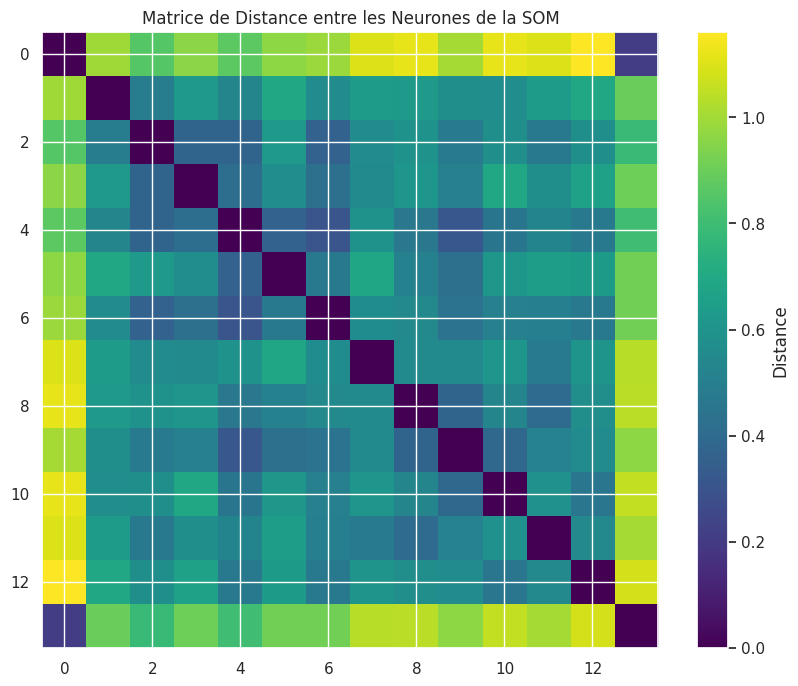

In [55]:
dist_neuron = som.distance_map().T

distance_matrix = pairwise_distances(dist_neuron)

plt.figure(figsize=(10, 8))
plt.imshow(distance_matrix, cmap='viridis')
plt.colorbar(label='Distance')
plt.title("Matrice de Distance entre les Neurones de la SOM")
plt.show()

Le graphique ci-dessus représente la matrice des distances entre les différents neurones de la SOM. Les distances observées sont importantes, ce qui rend difficile la formation de clusters entre les neurones proches 

### 3.3 Qualité d'un prédicteur 

In [56]:
with open("logreg.pkl", 'rb') as fichier : 
    logreg = pickle.load(fichier)

Model: KMeans


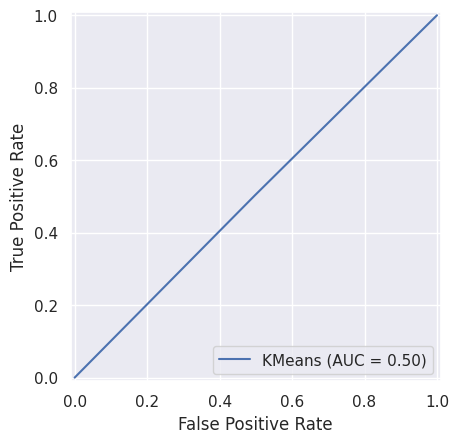

Model: KNeighborsClassifier


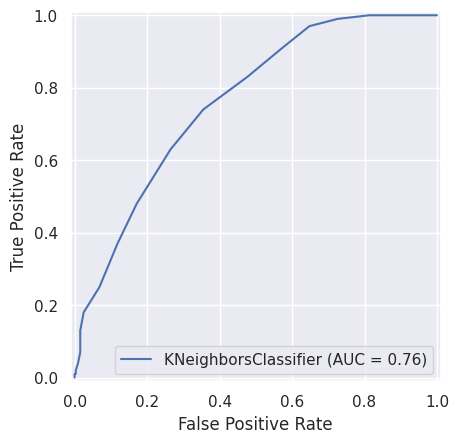

Model: RandomForestClassifier


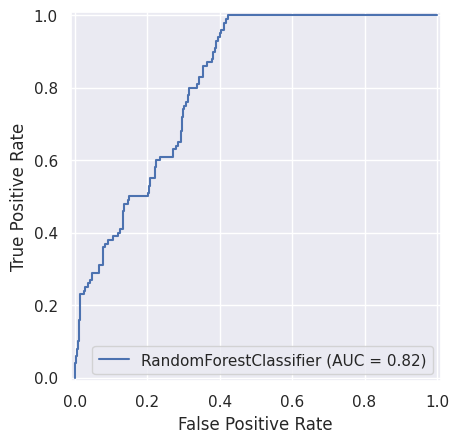

Model: AgglomerativeClustering


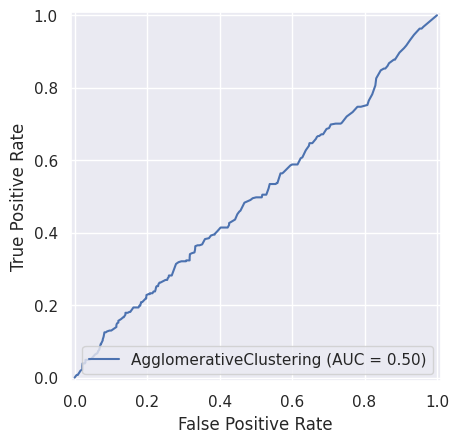

Model: LogisticRegression


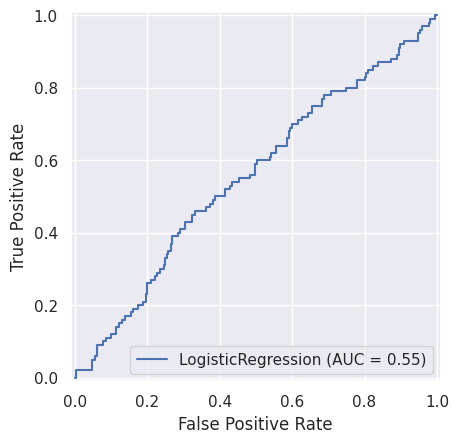

In [57]:
models = [kmeans, knn, rdf, ahc, logreg]
for mod in models:
    model_name = mod.__class__.__name__
    print(f"Model: {model_name}")
  
    if model_name in ["KMeans", "AgglomerativeClustering"]:
        y_pred = mod.fit_predict(X_train)
        fpr, tpr, _ = metrics.roc_curve(y_train, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_name).plot()
        plt.show()
    
    # Classification (predict_proba if available)
    elif model_name in ["KNeighborsClassifier", "RandomForestClassifier", "LogisticRegression"]:
        if hasattr(mod, "predict_proba"):
            y_score = mod.predict_proba(X_test)[:, 1]
        else:
            y_score = mod.predict(X_test)
        fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
        roc_auc = metrics.auc(fpr, tpr)
        metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_name).plot()
        plt.show()


Les graphiques ci-dessus illustrent les courbes ROC pour différents modèles, avec le taux de faux positifs en abscisse et le taux de vrais positifs en ordonnée. La courbe bleue montre la performance du modèle. L'aire sous la courbe (AUC) mesure la capacité du modèle à différencier les classes. Un AUC de 1 indique un modèle parfait, capable de prédire sans erreur, tandis qu'un AUC de 0,5 indique un modèle qui ne fait pas mieux qu'une prédiction aléatoire.

Les graphiques montrent que les méthodes de classification non supervisées, KMeans et la classification hiérarchique, donnent des résultats aléatoires, avec un AUC d'environ 0,5. La régression logistique affiche un performance très légèrement superieur avec un AUC de 0,55.

Pour ces données, il semble que les méthodes de classification supervisées soient les plus performantes. En effet, le modèle k-NN obtient un AUC de 0,76 et la Random Forest un AUC de 0,82. 

## Conclusion

L'objectif de cette étude était d'identifier la méthode la plus appropriée pour évaluer la qualité de l'eau et de déterminer, à partir de divers paramètres, si elle était potable ou non.

### Exploration du jeu de données

Les analyses exploratoires ont rapidement mis en évidence des incohérences dans les données. Des échantillons d'eau considérés comme potables présentaient des concentrations de paramètres en dehors des plages considérées comme sûres. La suppression de ces valeurs a entraîné la disparition de toutes les observations d'eau potable dans le jeu de données, ce qui a soulevé des questions sur la qualité de celui-ci. De plus, la représentation graphique des différentes variables a mis en évidence que l'ensemble des paramètres étaient distribués normalement, mais on a également pu voir l'absence de corrélation entre des variables supposées corrélées, comme la conductivité et les solides dissous. 

### Classification des observations

En raison de la nature aléatoire des variables, la classification des observations s'est avérée compliqué sans l'utilisation de modèles supervisés. Ces modèles, tels que la random forest, sont plus efficaces dans ce contexte, car ils apprennent à partir des relations existantes entre les variables et la variable cible. Contrairement aux méthodes non supervisées, qui cherchent des structures dans les données sans information sur la variable cible, les modèles supervisés peuvent s'adapter à des données complexes et potentiellement bruitées pour prédire la potabilité.

Les résultats obtenus suggèrent que la random forest est la méthode la plus appropriée pour ce jeu de données. Cependant, il est crucial de garder à l'esprit que la qualité des résultats a été fortement limité par les incohérences et les potentielles simulations présentes dans le jeu de données. De plus, il est probable qu'avec des données, d'autres méthodes de classification ou de prédiction auraient pu donner des résultats concluants. I

### Difficultés rencontrées
Ce projet a permis de mettre l'importance cruciale de la qualité des données en data science. J'ai également été confronté à la difficulté de choisir les paramètres appropriés, c'est un processus quelques fois subjectif. Il est facile de s'engager dans une mauvaise direction et de se convaincre de la pertinence de ses choix. Cependant, cette expérience m'a appris qu'il est essentiel d'explorer et de tester différentes possibilités pour obtenir des résultats fiables.



